### 1) Introduction and Data Loading

In [4]:
import seaborn as sns
from catboost import CatBoostClassifier
print("üî• Everything is working in the right environment!")


üî• Everything is working in the right environment!


In [8]:
# =====================================
# üìò Thesis Project - Dropout Prediction
# Section: Introduction & Data Loading
# Author: Tobias Benavides
# Date: March 21, 2025
# =====================================

# üîß Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# üßæ Project Context
"""
This notebook is part of the thesis project: 
"Where did the students go? Leveraging Oversampling and Neural Networks to Predict University Dropouts".

Objective:
- Load and explore the dataset from the UCI Machine Learning Repository.
- Prepare the data for further preprocessing and modeling stages.
- Ensure modularity and flexibility in case the dataset is updated or replaced.

Key Focus:
- Understand the target variable distribution (Graduated / Dropout / Enrolled).
- Begin preliminary checks to identify structure, data types, and basic integrity.
"""

# üìÇ Configurable Dataset Path
# You can change this path later if you switch to a new version or source of the dataset.
DATA_PATH = "data"

# ‚úÖ Load Dataset with proper delimiter
try:
df = pd.read_csv("data/data.csv", delimiter=';')
    print(f"‚úÖ Data successfully loaded! Shape: {df.shape}")
    df_cleaned = df.copy()  # Save a clean working copy
except FileNotFoundError:
    print(f"‚ùå File not found at path: {DATA_PATH}")
    df = None


# üßæ Preview the Dataset
if df is not None:
    display(df.head())
    display(df.info())
    display(df.describe(include='all'))


IndentationError: expected an indented block after 'try' statement on line 34 (1472461702.py, line 35)

### 2) Data Cleaning 

In [7]:
# =====================================
# üßπ Section: Data Cleaning
# =====================================

# üßº Basic Cleaning Tasks
"""
Goal:
- Ensure there are no missing values, incorrect data types, or unexpected values.
- Prepare a clean dataset ready for analysis and modeling.

Assumption:
- The dataset from UCI is known to have no missing values, but we confirm this for future-proofing.
"""

# 1. Check for Missing Values
missing_values = df.isnull().sum()
missing_summary = missing_values[missing_values > 0]

if missing_summary.empty:
    print("‚úÖ No missing values found in the dataset.")
else:
    print("‚ö†Ô∏è Missing values detected:")
    display(missing_summary)

# 2. Check for Duplicate Rows
duplicate_count = df.duplicated().sum()
print(f"üîÅ Duplicate rows found: {duplicate_count}")

# Drop duplicates if any
if duplicate_count > 0:
    df = df.drop_duplicates()
    print("‚úÖ Duplicates removed.")

# 3. Check Data Types
print("\nüìä Data Types:")
display(df.dtypes)

# Optional: Convert types (if needed)
# Example: Convert target column to category (adjust column name if yours is different)
if 'Target' in df.columns:
    df['Target'] = df['Target'].astype('category')
    print("‚úÖ Converted 'Target' column to category type.")

# 4. Sanity Checks on Categorical Columns
# Identify object-type columns (likely to be categorical)
object_cols = df.select_dtypes(include='object').columns
print(f"\nüîé Categorical columns: {list(object_cols)}")

# Display unique values for inspection (trimmed at 10 per column)
for col in object_cols:
    print(f"\nüß† Column: {col}")
    print(df[col].value_counts().head(10))

# 5. Save cleaned data snapshot
df_cleaned = df.copy()
print(f"\n‚úÖ Data cleaning complete. Cleaned data shape: {df_cleaned.shape}")


NameError: name 'df' is not defined

## 2.1)  Additional Data Cleaning

‚úÖ Outlier capping applied to numerical columns.


/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


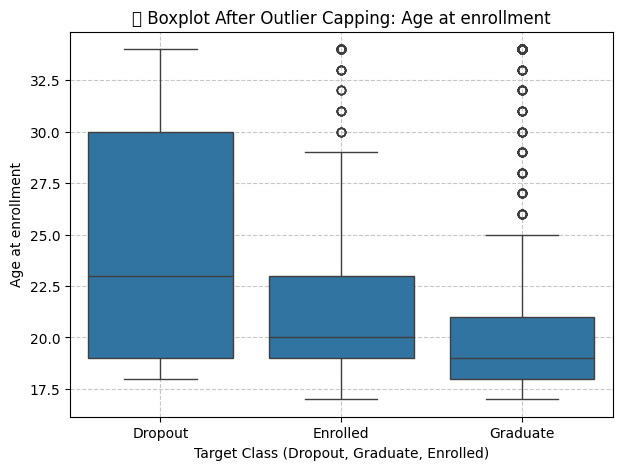

/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


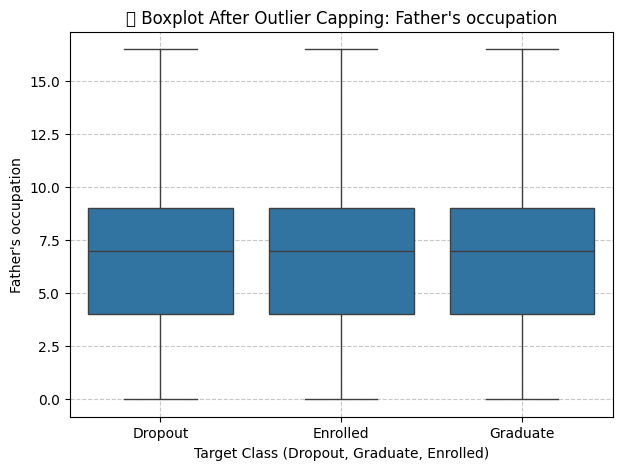

/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


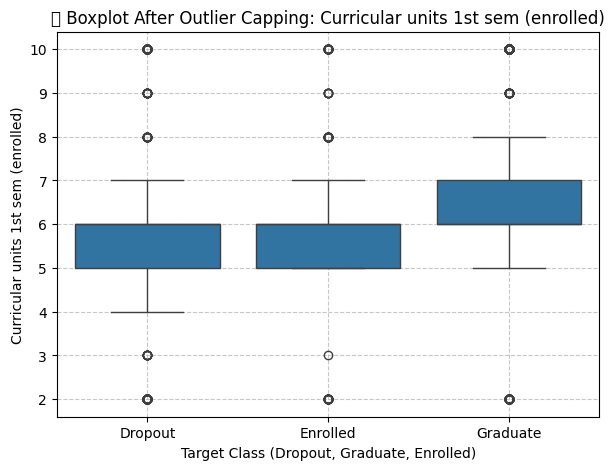

/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


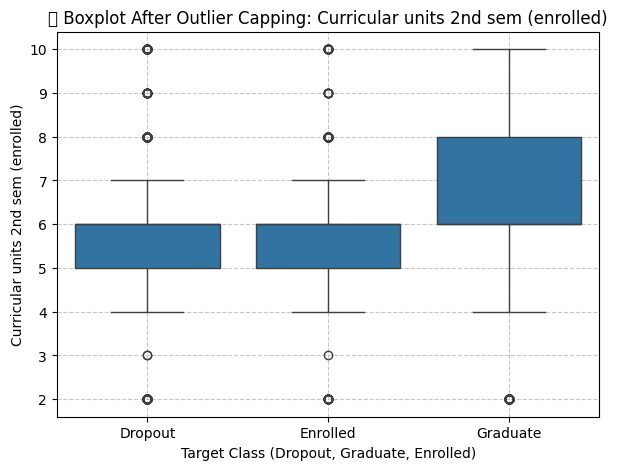

In [ ]:
# =====================================
# üìä Additional Cleaning: Outlier Handling
# =====================================

# Function to cap outliers using the IQR method
def cap_outliers_iqr(df, columns):
    """Caps outliers in specified columns using the IQR method."""
    df_capped = df.copy()
    for col in columns:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)
    return df_capped

# Columns selected based on Exploratory Data Analysis (EDA)
numerical_columns_with_outliers = [
    'Age at enrollment', 
    "Father's occupation",
    'Curricular units 1st sem (enrolled)',
    'Curricular units 2nd sem (enrolled)'
]

# Apply outlier capping to the cleaned dataset
df_cleaned = cap_outliers_iqr(df_cleaned, numerical_columns_with_outliers)

print("‚úÖ Outlier capping applied to numerical columns.")

# =====================================
# üìä Visualization: Boxplots After Outlier Capping
# =====================================

import matplotlib.pyplot as plt
import seaborn as sns

# At this stage, we use 'Target' (not yet 'Target_Encoded')
for col in numerical_columns_with_outliers:
    plt.figure(figsize=(7, 5))
    sns.boxplot(x=df_cleaned['Target'], y=df_cleaned[col])
    plt.title(f"üéØ Boxplot After Outlier Capping: {col}")
    plt.xlabel("Target Class (Dropout, Graduate, Enrolled)")
    plt.ylabel(col)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()




### 2.3) Categorization of features

In [ ]:
# === Group features by category ===
demographic_features = [
    'Marital status', 'Nacionality', 'Displaced', 'Gender',
    'Age at enrollment', 'International'
]

socioeconomic_features = [
    "Father's qualification", "Mother's qualification",
    "Father's occupation", "Mother's occupation",
    'Educational special needs', 'Debtor',
    'Tuition fees up to date', 'Scholarship holder'
]

macroeconomic_features = [
    'Unemployment rate', 'Inflation rate', 'GDP'
]

# Automatically find the rest as academic
all_features = X.columns.tolist()
academic_features = list(set(all_features) - set(demographic_features + socioeconomic_features + macroeconomic_features))

# === Optional: Print feature counts ===
print(f"üìå Demographic Features ({len(demographic_features)}): {demographic_features}")
print(f"üìå Socioeconomic Features ({len(socioeconomic_features)}): {socioeconomic_features}")
print(f"üìå Macroeconomic Features ({len(macroeconomic_features)}): {macroeconomic_features}")
print(f"üìå Academic Features ({len(academic_features)}): {sorted(academic_features)}")


üìå Demographic Features (6): ['Marital status', 'Nacionality', 'Displaced', 'Gender', 'Age at enrollment', 'International']
üìå Socioeconomic Features (8): ["Father's qualification", "Mother's qualification", "Father's occupation", "Mother's occupation", 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Scholarship holder']
üìå Macroeconomic Features (3): ['Unemployment rate', 'Inflation rate', 'GDP']
üìå Academic Features (19): ['Admission grade', 'Application mode', 'Application order', 'Course', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without

### 3 EDA

/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


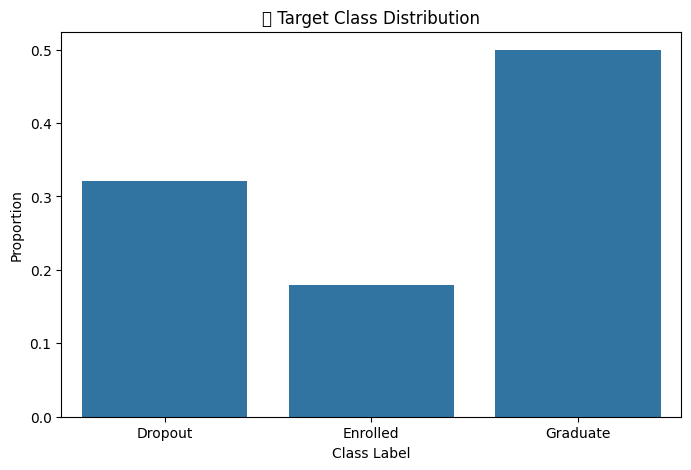


üìà Class Distribution:


Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

/var/folders/vx/wj4sx6bd6t37bv1qb_xg5f4r0000gp/T/ipykernel_30766/474654313.py:43: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


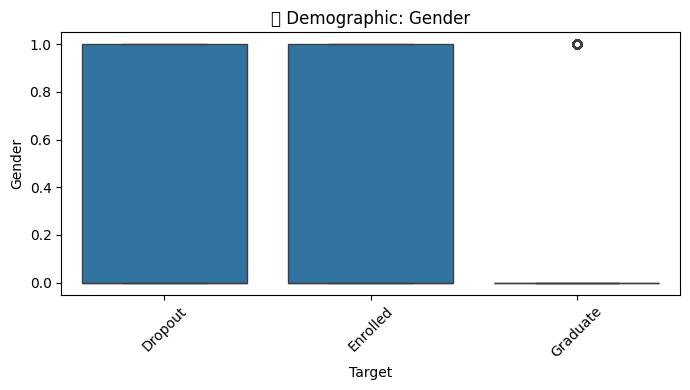

/var/folders/vx/wj4sx6bd6t37bv1qb_xg5f4r0000gp/T/ipykernel_30766/474654313.py:43: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


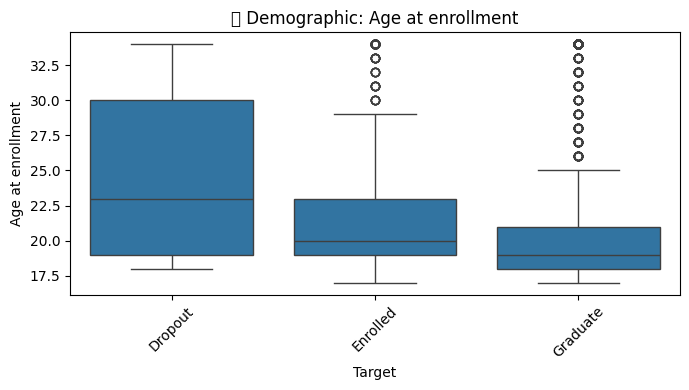

/var/folders/vx/wj4sx6bd6t37bv1qb_xg5f4r0000gp/T/ipykernel_30766/474654313.py:43: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


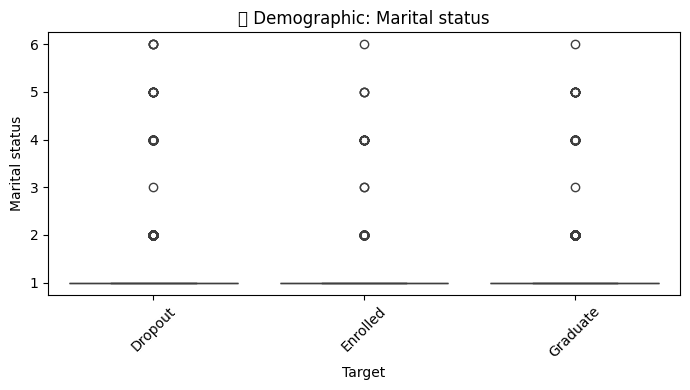

/var/folders/vx/wj4sx6bd6t37bv1qb_xg5f4r0000gp/T/ipykernel_30766/474654313.py:43: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


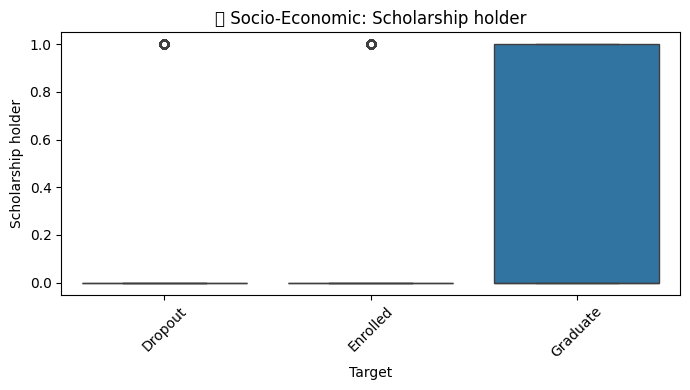

/var/folders/vx/wj4sx6bd6t37bv1qb_xg5f4r0000gp/T/ipykernel_30766/474654313.py:43: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


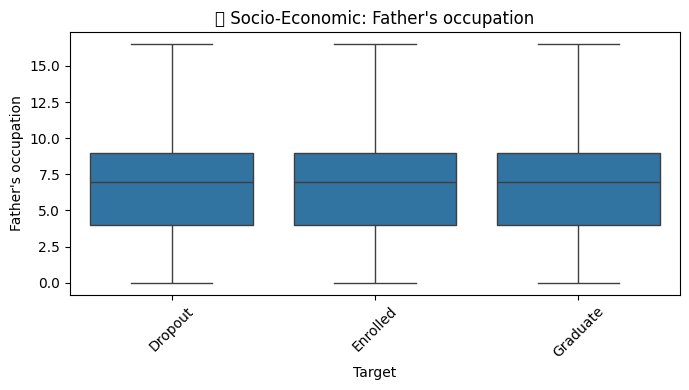

/var/folders/vx/wj4sx6bd6t37bv1qb_xg5f4r0000gp/T/ipykernel_30766/474654313.py:43: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


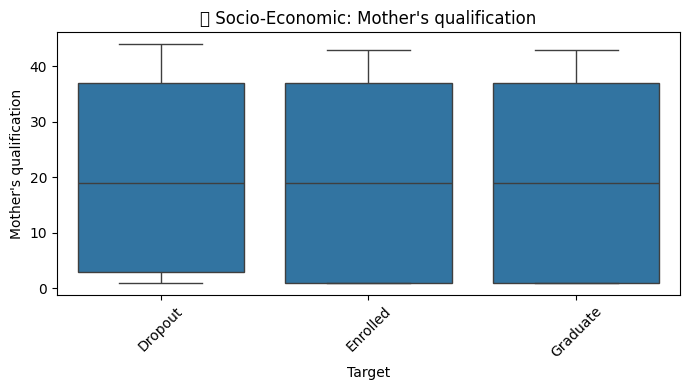

/var/folders/vx/wj4sx6bd6t37bv1qb_xg5f4r0000gp/T/ipykernel_30766/474654313.py:43: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


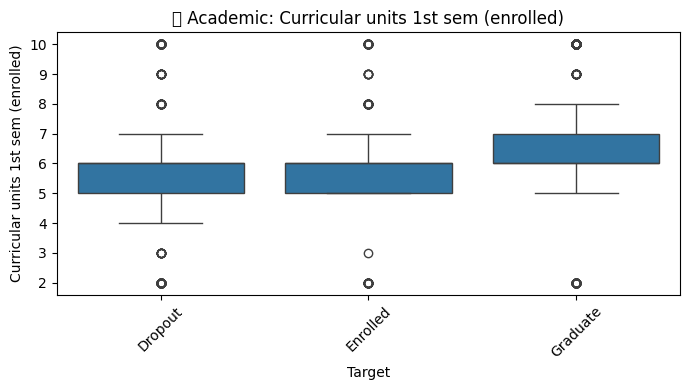

/var/folders/vx/wj4sx6bd6t37bv1qb_xg5f4r0000gp/T/ipykernel_30766/474654313.py:43: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


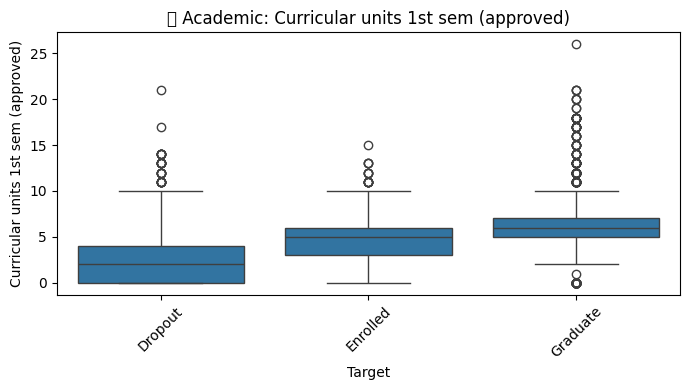

/var/folders/vx/wj4sx6bd6t37bv1qb_xg5f4r0000gp/T/ipykernel_30766/474654313.py:43: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


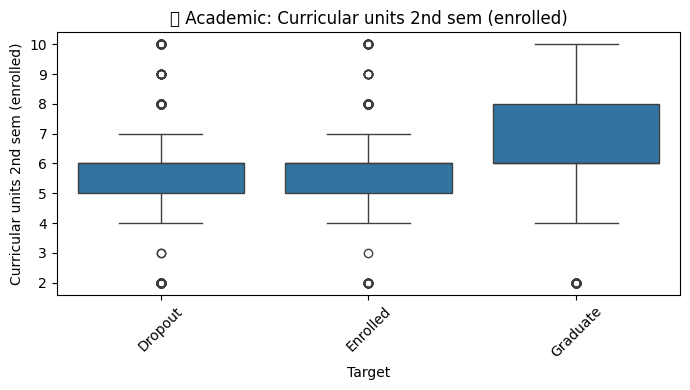

/var/folders/vx/wj4sx6bd6t37bv1qb_xg5f4r0000gp/T/ipykernel_30766/474654313.py:43: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


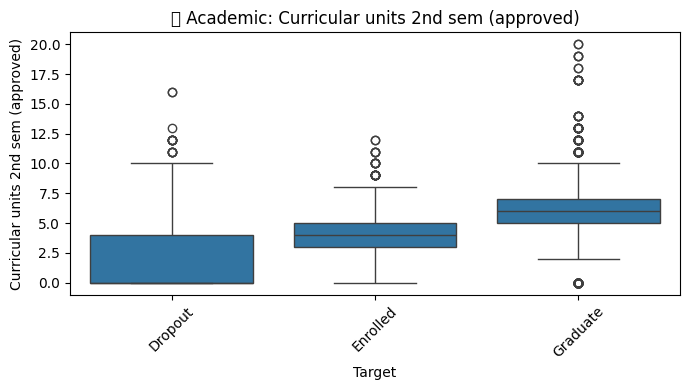

/var/folders/vx/wj4sx6bd6t37bv1qb_xg5f4r0000gp/T/ipykernel_30766/474654313.py:43: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


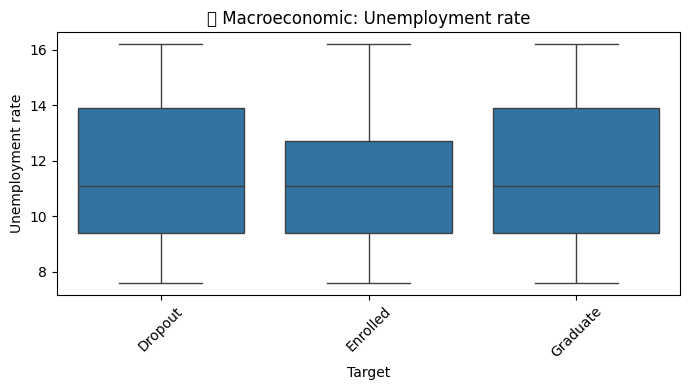

/var/folders/vx/wj4sx6bd6t37bv1qb_xg5f4r0000gp/T/ipykernel_30766/474654313.py:43: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


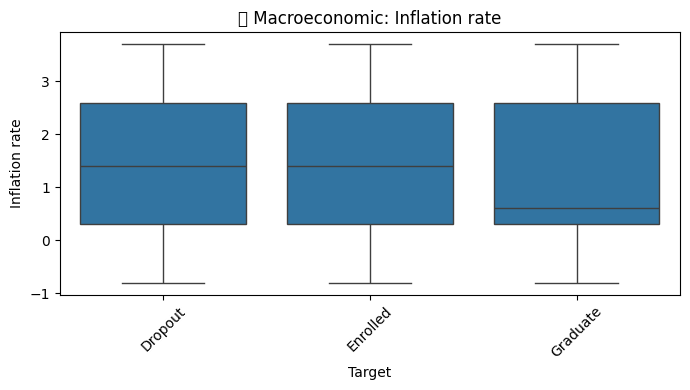

/var/folders/vx/wj4sx6bd6t37bv1qb_xg5f4r0000gp/T/ipykernel_30766/474654313.py:43: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


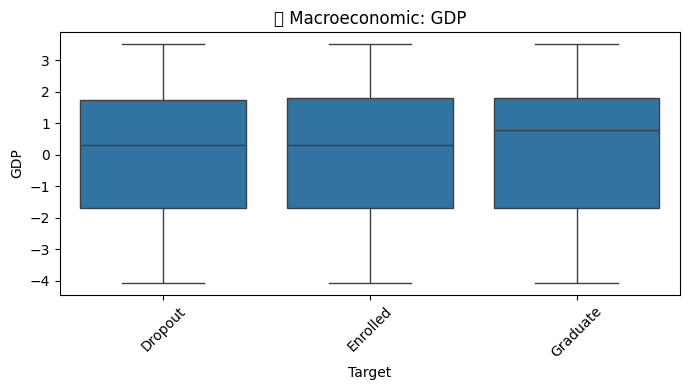

/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


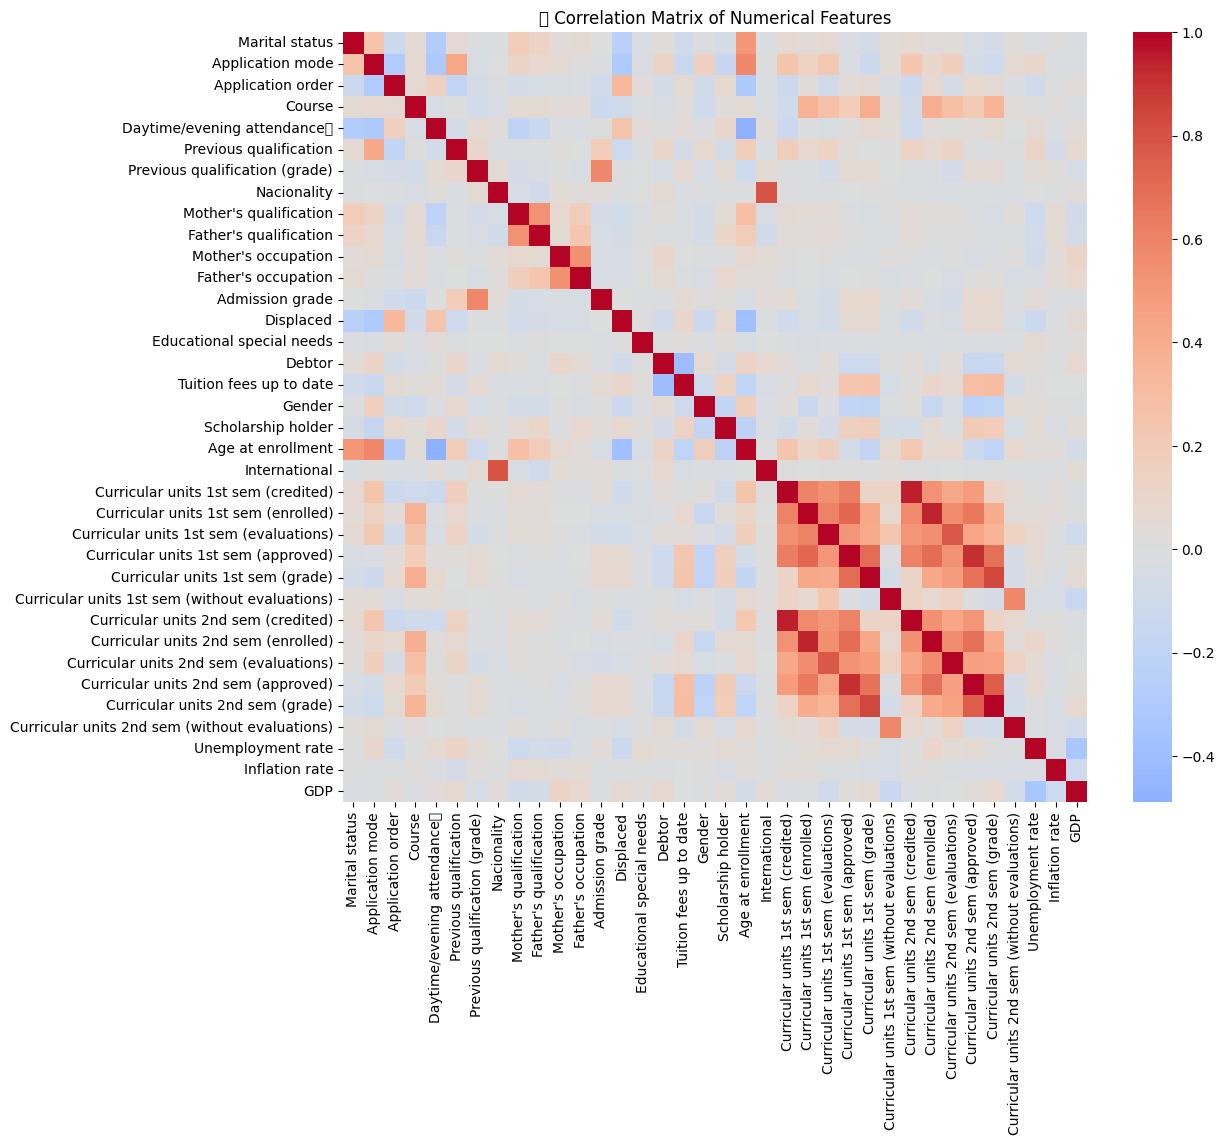

In [ ]:
# =====================================
# üìä Section: Exploratory Data Analysis (EDA)
# Including: Target Encoding + Feature Grouping
# =====================================

# üéØ Confirm target column and encode
TARGET_COL = 'Target'
label_mapping = {'Dropout': 0, 'Graduate': 1, 'Enrolled': 2}  # Enrolled will be removed later
df_cleaned['Target_Encoded'] = df_cleaned[TARGET_COL].map(label_mapping)

# üü¢ Class Distribution Plot (original labels)
target_counts = df_cleaned[TARGET_COL].value_counts(normalize=True).sort_index()
plt.figure(figsize=(8, 5))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title("üéØ Target Class Distribution")
plt.ylabel("Proportion")
plt.xlabel("Class Label")
plt.show()

print("\nüìà Class Distribution:")
display(df_cleaned[TARGET_COL].value_counts())

# üóÇÔ∏è Feature Groups (based on thesis proposal)
demographic_cols = ['Gender', 'Age at enrollment', 'Nationality', 'Marital status']
socioeconomic_cols = ["Scholarship holder", "Father's occupation", "Mother's qualification"]
academic_cols = [
    'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 
    'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)'
]
macroeconomic_cols = ['Unemployment rate', 'Inflation rate', 'GDP']

# üé® Plotting Helper Function
def plot_feature_distributions(feature_list, title_prefix):
    for col in feature_list:
        if col in df_cleaned.columns:
            plt.figure(figsize=(7, 4))
            if df_cleaned[col].dtype in ['object', 'category']:
                sns.countplot(data=df_cleaned, x=col, hue=TARGET_COL)
            else:
                sns.boxplot(data=df_cleaned, x=TARGET_COL, y=col)
            plt.title(f"{title_prefix}: {col}")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

# üß¨ Demographic Features
plot_feature_distributions(demographic_cols, "üß¨ Demographic")

# üí∞ Socio-Economic Features
plot_feature_distributions(socioeconomic_cols, "üí∞ Socio-Economic")

# üéì Academic Features
plot_feature_distributions(academic_cols, "üéì Academic")

# üåç Macroeconomic Features
plot_feature_distributions(macroeconomic_cols, "üåç Macroeconomic")

# üîç Correlation Matrix (numeric only, including encoded target)
numerical_df = df_cleaned.select_dtypes(include='number')

if numerical_df.shape[1] == 0:
    print("‚ö†Ô∏è No numerical columns found ‚Äî skipping correlation matrix.")
else:
    plt.figure(figsize=(12, 10))
    correlation = numerical_df.corr()
    sns.heatmap(correlation, annot=False, cmap='coolwarm', fmt=".2f", center=0)
    plt.title("üîç Correlation Matrix of Numerical Features")
    plt.show()


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import shap

# ========== Load and Prepare Data ==========
file_path = "data/data.csv"  # Replace with your actual file path
df_cleaned = pd.read_csv(file_path)

# Drop unnecessary class (if still present)
df_cleaned = df_cleaned[df_cleaned['Target'].isin(['Dropout', 'Graduate'])]

# Encode target
label_mapping = {'Dropout': 0, 'Graduate': 1}
df_cleaned['Target_Encoded'] = df_cleaned['Target'].map(label_mapping)

# Encode categorical features
label_encoders = {}
for col in df_cleaned.select_dtypes(include='object').columns:
    if col != 'Target':  # Already handled above
        le = LabelEncoder()
        df_cleaned[col] = le.fit_transform(df_cleaned[col])
        label_encoders[col] = le

# ========== Target Distribution ==========
sns.countplot(x="Target", data=df_cleaned)
plt.title("Class Distribution")
plt.show()

# ========== Random Forest Model ==========
X = df_cleaned.drop(columns=["Target", "Target_Encoded"])
y = df_cleaned["Target_Encoded"]
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# ========== Feature Importances ==========
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Features (Random Forest)")
plt.show()

# ========== SHAP Explanation ==========
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values[1], X, plot_type="bar")  # Class 1 = Graduate
shap.summary_plot(shap_values[1], X)

# ========== Correlation Heatmap ==========
plt.figure(figsize=(12, 10))
sns.heatmap(df_cleaned.select_dtypes(include='number').corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

# ========== Category Breakdown for Low-Cardinality Features ==========
top_cat_feats = [col for col in importances.index if df_cleaned[col].nunique() < 15][:3]
for col in top_cat_feats:
    sns.countplot(x=col, data=df_cleaned, hue='Target')
    plt.title(f"Category Distribution: {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


KeyError: 'Target'

### 4. Feature Engineering and Preprocessing 

In [ ]:
# =====================================
# üõ†Ô∏è Section: Feature Engineering & Preprocessing (Improved)
# =====================================

from sklearn.preprocessing import LabelEncoder

# 1. ‚úÖ Remove "Enrolled" class from dataset (for final modeling)
df_model = df_cleaned[df_cleaned['Target'] != 'Enrolled'].copy()
print(f"‚úÖ Shape after removing 'Enrolled': {df_model.shape}")

# 2. üéØ Encode target variable: Dropout = 0, Graduate = 1
target_map = {'Dropout': 0, 'Graduate': 1}
df_model['Target_Encoded'] = df_model['Target'].map(target_map)

# (Optional) Remove original target column now to avoid drop errors later
df_model.drop(columns='Target', inplace=True)

# 3. üßº Encode categorical variables using LabelEncoder
# Safe column selection with error-tolerant drop
categorical_cols = df_model.select_dtypes(include=['object']).columns
le_dict = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    le_dict[col] = le  # Save encoders for inverse transform later

print(f"‚úÖ Categorical encoding complete. Encoded columns: {list(categorical_cols)}")

# 4. üß™ Split features/target
X = df_model.drop(columns='Target_Encoded')
y = df_model['Target_Encoded']

# Save feature names for reference
feature_names = X.columns.tolist()

print(f"üìä Feature matrix shape: {X.shape}")
print(f"üéØ Target vector shape: {y.shape}")
print("üéØ Target class distribution:\n", y.value_counts())




‚úÖ Shape after removing 'Enrolled': (3630, 38)
‚úÖ Categorical encoding complete. Encoded columns: []
üìä Feature matrix shape: (3630, 36)
üéØ Target vector shape: (3630,)
üéØ Target class distribution:
 Target_Encoded
1.0    2209
0.0    1421
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Remove "Enrolled" class
df_model = df_cleaned[df_cleaned['Target'] != 'Enrolled'].copy()

# Encode target
target_map = {'Dropout': 0, 'Graduate': 1}
df_model['Target_Encoded'] = df_model['Target'].map(target_map)

# Remove original target
df_model.drop(columns='Target', inplace=True)

# Encode categorical variables
categorical_cols = df_model.select_dtypes(include=['object']).columns
le_dict = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    le_dict[col] = le

print(f"‚úÖ Categorical encoding complete. Encoded columns: {list(categorical_cols)}")



‚úÖ Categorical encoding complete. Encoded columns: []


### 4.1) Splitting step

In [ ]:
# =====================================
# üß™ Split Features and Target
# =====================================

# Create feature matrix (X) and target vector (y)
X = df_model.drop(columns='Target_Encoded')
y = df_model['Target_Encoded']

# Save feature names for reference
feature_names = X.columns.tolist()

# Sanity check
print(f"üìä Feature matrix shape: {X.shape}")
print(f"üéØ Target vector shape: {y.shape}")
print("üéØ Target class distribution:\n", y.value_counts())


üìä Feature matrix shape: (3630, 36)
üéØ Target vector shape: (3630,)
üéØ Target class distribution:
 Target_Encoded
1.0    2209
0.0    1421
Name: count, dtype: int64


## 4.2 Feature Selection and Correlation

In [ ]:
# =====================================
# üéØ Step: Feature Selection based on Correlation
# =====================================

import numpy as np 

# 1. Calculate the correlation matrix (only for features, not target)
correlation_matrix = X.corr().abs()

# 2. Select the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# 3. Find features with correlation greater than threshold
correlation_threshold = 0.95  # You can adjust if needed
to_drop = [
    column for column in upper_triangle.columns
    if any(upper_triangle[column] > correlation_threshold)
]

print(f"üìâ Features to drop due to high correlation (> {correlation_threshold}):")
print(to_drop)

# 4. Drop selected features from X
X_selected = X.drop(columns=to_drop)

# 5. Print new shape
print(f"‚úÖ Shape after feature selection: {X_selected.shape}")


üìâ Features to drop due to high correlation (> 0.95):
[]
‚úÖ Shape after feature selection: (3630, 36)


In [ ]:
# List of dropped features
dropped_features = pd.Series(to_drop)
print("üìâ Dropped Features Due to High Correlation:")
print(dropped_features)

# Optional: Save for appendix
dropped_features.to_csv("dropped_features.csv", index=False)


üìâ Dropped Features Due to High Correlation:
Series([], dtype: object)


### 4.3) Categorization of features

In [ ]:
# === Group features by category ===
demographic_features = [
    'Marital status', 'Nacionality', 'Displaced', 'Gender',
    'Age at enrollment', 'International'
]

socioeconomic_features = [
    "Father's qualification", "Mother's qualification",
    "Father's occupation", "Mother's occupation",
    'Educational special needs', 'Debtor',
    'Tuition fees up to date', 'Scholarship holder'
]

macroeconomic_features = [
    'Unemployment rate', 'Inflation rate', 'GDP'
]

# Automatically find the rest as academic
all_features = X.columns.tolist()
academic_features = list(set(all_features) - set(demographic_features + socioeconomic_features + macroeconomic_features))

# === Optional: Print feature counts ===
print(f"üìå Demographic Features ({len(demographic_features)}): {demographic_features}")
print(f"üìå Socioeconomic Features ({len(socioeconomic_features)}): {socioeconomic_features}")
print(f"üìå Macroeconomic Features ({len(macroeconomic_features)}): {macroeconomic_features}")
print(f"üìå Academic Features ({len(academic_features)}): {sorted(academic_features)}")

üìå Demographic Features (6): ['Marital status', 'Nacionality', 'Displaced', 'Gender', 'Age at enrollment', 'International']
üìå Socioeconomic Features (8): ["Father's qualification", "Mother's qualification", "Father's occupation", "Mother's occupation", 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Scholarship holder']
üìå Macroeconomic Features (3): ['Unemployment rate', 'Inflation rate', 'GDP']
üìå Academic Features (19): ['Admission grade', 'Application mode', 'Application order', 'Course', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without

### 5) Models 

### 5.1) Random Forrests 

üìä Classification Report:

              precision    recall  f1-score   support

         0.0       0.94      0.82      0.88       284
         1.0       0.89      0.97      0.93       442

    accuracy                           0.91       726
   macro avg       0.92      0.89      0.90       726
weighted avg       0.91      0.91      0.91       726



/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


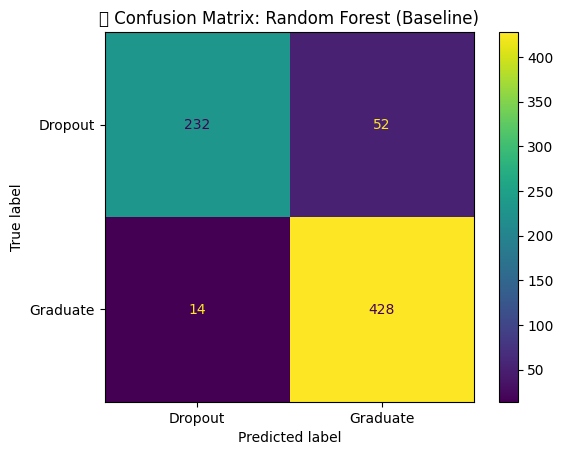

‚úÖ Cross-validated F1 scores: [0.89580514 0.93894166 0.94198895 0.92434663 0.92050209]
üìå Mean F1 Score (CV): 0.9243


In [ ]:
# =====================================
# üå≤ Baseline Model: Random Forest (No Oversampling)
# =====================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score

# 1. ‚úÇÔ∏è Train-test split (80/20) ‚Äî stratify to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. üå≤ Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# 3. üß™ Train model
rf.fit(X_train, y_train)

# 4. üîç Evaluate on test set
y_pred = rf.predict(X_test)
print("üìä Classification Report:\n")
print(classification_report(y_test, y_pred))

# 5. üìâ Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Dropout", "Graduate"])
plt.title("üîç Confusion Matrix: Random Forest (Baseline)")
plt.show()

# 6. üìà Cross-validated F1 score (on train set)
f1_scores = cross_val_score(rf, X_train, y_train, scoring='f1', cv=5)
print(f"‚úÖ Cross-validated F1 scores: {f1_scores}")
print(f"üìå Mean F1 Score (CV): {f1_scores.mean():.4f}")


## 5.1.1) Random Forrest V2 GPT 

üìä Classification Report on Test Set:

              precision    recall  f1-score   support

     Dropout       0.95      0.81      0.88       284
    Graduate       0.89      0.98      0.93       442

    accuracy                           0.91       726
   macro avg       0.92      0.89      0.90       726
weighted avg       0.91      0.91      0.91       726



/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


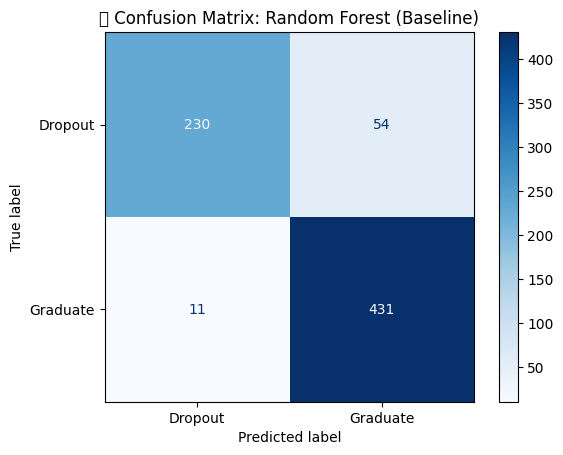

‚úÖ Cross-validated F1 scores: [0.93084523 0.92661555 0.92920354 0.92803437 0.92524377]
üìå Mean F1 Score (5-fold CV): 0.9280


In [ ]:
# =====================================
# üå≤ Improved Baseline: Random Forest (No Oversampling)
# =====================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt

# 1. ‚úÇÔ∏è Train-test split (80/20) ‚Äî stratify to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, stratify=y, random_state=42
)

# 2. üå≤ Initialize Random Forest model (with class_weight and reproducible depth)
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=100,
    class_weight='balanced',
    random_state=42
)

# 3. üß™ Train model
rf.fit(X_train, y_train)

# 4. üîç Evaluate on test set
y_pred = rf.predict(X_test)
print("üìä Classification Report on Test Set:\n")
print(classification_report(y_test, y_pred, target_names=["Dropout", "Graduate"]))

# 5. üìâ Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    rf, X_test, y_test, display_labels=["Dropout", "Graduate"], cmap='Blues'
)
plt.title("üîç Confusion Matrix: Random Forest (Baseline)")
plt.grid(False)
plt.show()

# 6. üìà Cross-validated F1 score (on full data)
f1_scores = cross_val_score(rf, X_selected, y, scoring='f1', cv=5)
print(f"‚úÖ Cross-validated F1 scores: {f1_scores}")
print(f"üìå Mean F1 Score (5-fold CV): {f1_scores.mean():.4f}")


##### as we increased the max depth the F1 score increased to 0.928 and then stagnated

## 5.1.2) Error Analysis for RANDOM FORREDT baseline GPT

üìä Error Type Distribution:
error_type
Correct           660
False Positive     48
False Negative     18
Name: count, dtype: int64


/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


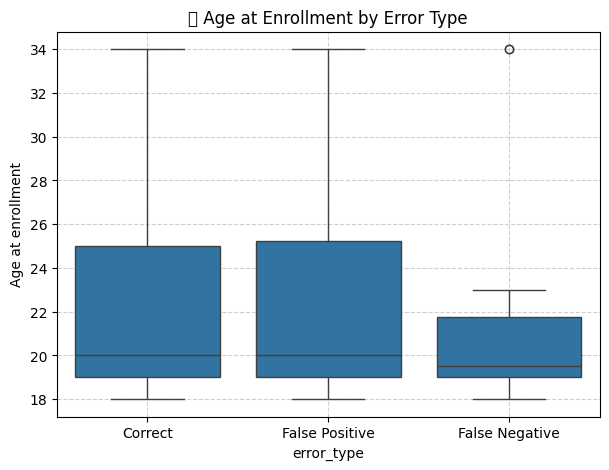

üìä Mean Father's Occupation Score by Error Type:
error_type
Correct           6.643182
False Negative    6.500000
False Positive    6.604167
Name: Father's occupation, dtype: float64


In [ ]:
# =====================================
# üîç Error Analysis: Who Gets Misclassified?
# =====================================

# Reattach true/pred labels to X_test
df_errors = X_test.copy()
df_errors['y_true'] = y_test
df_errors['y_pred'] = y_pred

# Create flags
df_errors['error_type'] = np.select(
    [
        (df_errors['y_true'] == 1) & (df_errors['y_pred'] == 0),  # false negative
        (df_errors['y_true'] == 0) & (df_errors['y_pred'] == 1),  # false positive
        (df_errors['y_true'] == df_errors['y_pred'])              # correct
    ],
    ['False Negative', 'False Positive', 'Correct'],
    default='Other'
)

# View distribution of error types
print("üìä Error Type Distribution:")
print(df_errors['error_type'].value_counts())

# Example 1: Compare age by error type
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_errors, x='error_type', y='Age at enrollment')
plt.title("üìâ Age at Enrollment by Error Type")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Example 2: Breakdown of Father‚Äôs occupation (if encoded)
if "Father's occupation" in df_errors.columns:
    print("üìä Mean Father's Occupation Score by Error Type:")
    print(df_errors.groupby('error_type')["Father's occupation"].mean())


### 5.1.3) Random Forrest with SMOTE GPT

‚úÖ Applied SMOTE. Class distribution after resampling:
Target_Encoded
1.0    1767
0.0    1767
Name: count, dtype: int64
üìä Classification Report (Test Set):

              precision    recall  f1-score   support

     Dropout       0.94      0.82      0.88       284
    Graduate       0.89      0.96      0.93       442

    accuracy                           0.91       726
   macro avg       0.92      0.89      0.90       726
weighted avg       0.91      0.91      0.91       726



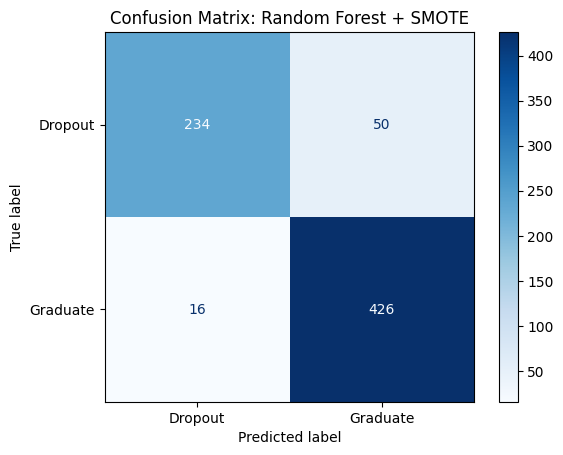

üéØ F1 Score: 0.9281
üéØ Accuracy: 0.9091


In [ ]:
# =====================================
# üîÑ Random Forest with SMOTE Oversampling
# =====================================

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# 1. ‚úÇÔ∏è Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, stratify=y, random_state=42
)

# 2. üîÑ Apply SMOTE to the training set
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

print("‚úÖ Applied SMOTE. Class distribution after resampling:")
print(y_train_resampled.value_counts())

# 3. üå≤ Train Random Forest on balanced data
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    class_weight=None,  # Set to None since we're already balancing with SMOTE
    random_state=42
)
rf.fit(X_train_resampled, y_train_resampled)

# 4. üîç Predict and evaluate
y_pred = rf.predict(X_test)

print("üìä Classification Report (Test Set):\n")
print(classification_report(y_test, y_pred, target_names=["Dropout", "Graduate"]))

# 5. üìâ Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=["Dropout", "Graduate"], cmap='Blues'
)
plt.title("Confusion Matrix: Random Forest + SMOTE")
plt.grid(False)
plt.show()

# 6. üìà Evaluation Metrics
f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print(f"üéØ F1 Score: {f1:.4f}")
print(f"üéØ Accuracy: {acc:.4f}")


### 5.1.4) Random Forrest GPT with ADESYN

‚úÖ Applied ADASYN. Class distribution after resampling:
Target_Encoded
0.0    1841
1.0    1767
Name: count, dtype: int64
üìä Classification Report (Test Set):

              precision    recall  f1-score   support

     Dropout       0.93      0.83      0.88       284
    Graduate       0.90      0.96      0.93       442

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726



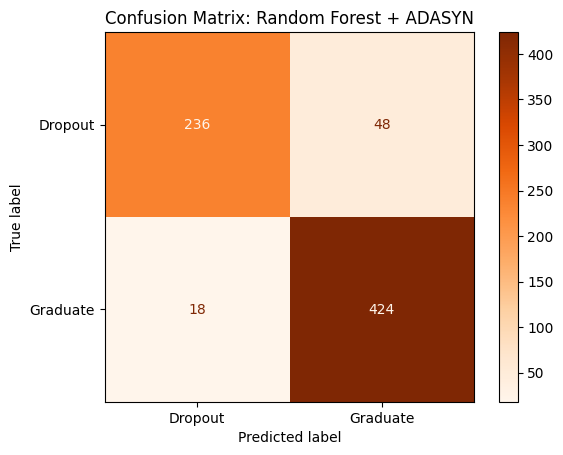

üéØ F1 Score: 0.9278
üéØ Accuracy: 0.9091


In [ ]:
# =====================================
# üîÑ Random Forest with ADASYN Oversampling
# =====================================

from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. ‚úÇÔ∏è Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, stratify=y, random_state=42
)

# 2. üîÑ Apply ADASYN to the training set
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

print("‚úÖ Applied ADASYN. Class distribution after resampling:")
print(y_train_resampled.value_counts())

# 3. üå≤ Train Random Forest on ADASYN-balanced data
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=100,
    class_weight=None,  # We're balancing manually with ADASYN
    random_state=42
)
rf.fit(X_train_resampled, y_train_resampled)

# 4. üîç Predict and evaluate
y_pred = rf.predict(X_test)

print("üìä Classification Report (Test Set):\n")
print(classification_report(y_test, y_pred, target_names=["Dropout", "Graduate"]))

# 5. üìâ Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=["Dropout", "Graduate"], cmap='Oranges'
)
plt.title("Confusion Matrix: Random Forest + ADASYN")
plt.grid(False)
plt.show()

# 6. üìà Evaluation Metrics
f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print(f"üéØ F1 Score: {f1:.4f}")
print(f"üéØ Accuracy: {acc:.4f}")


### 5.1.5) SHAP for Random Forrest

üìä SHAP Summary Plot: Feature Impact (Global View)


<Figure size 640x480 with 0 Axes>

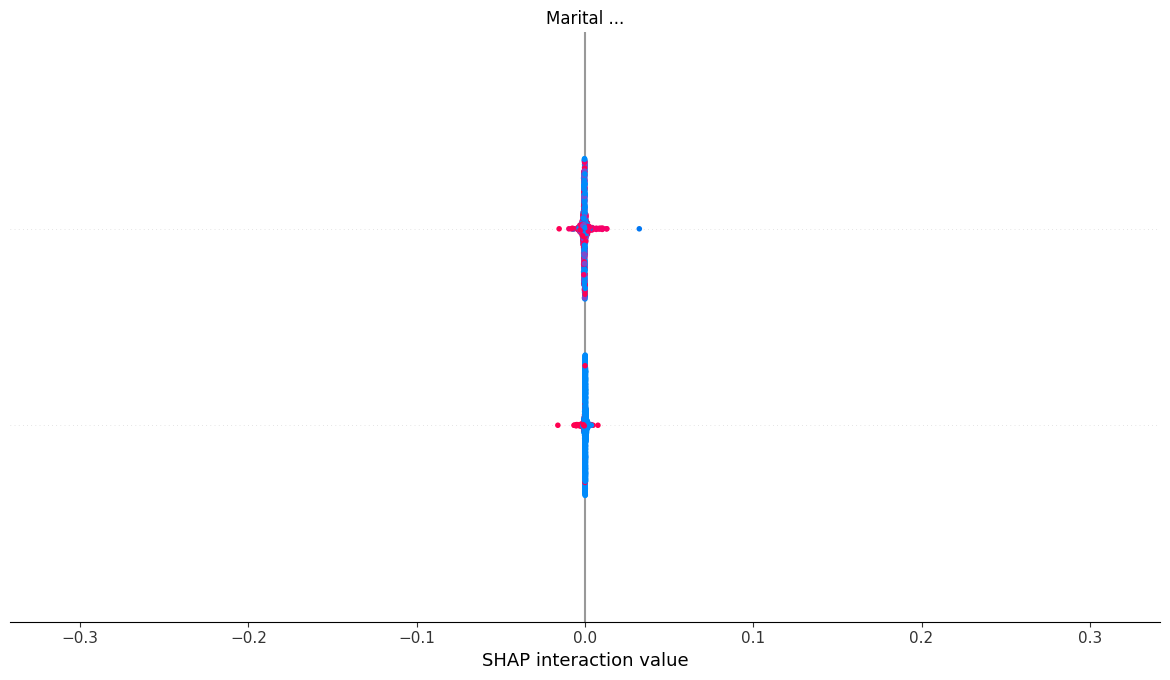

üìä SHAP Bar Plot: Mean Absolute Contribution


<Figure size 640x480 with 0 Axes>

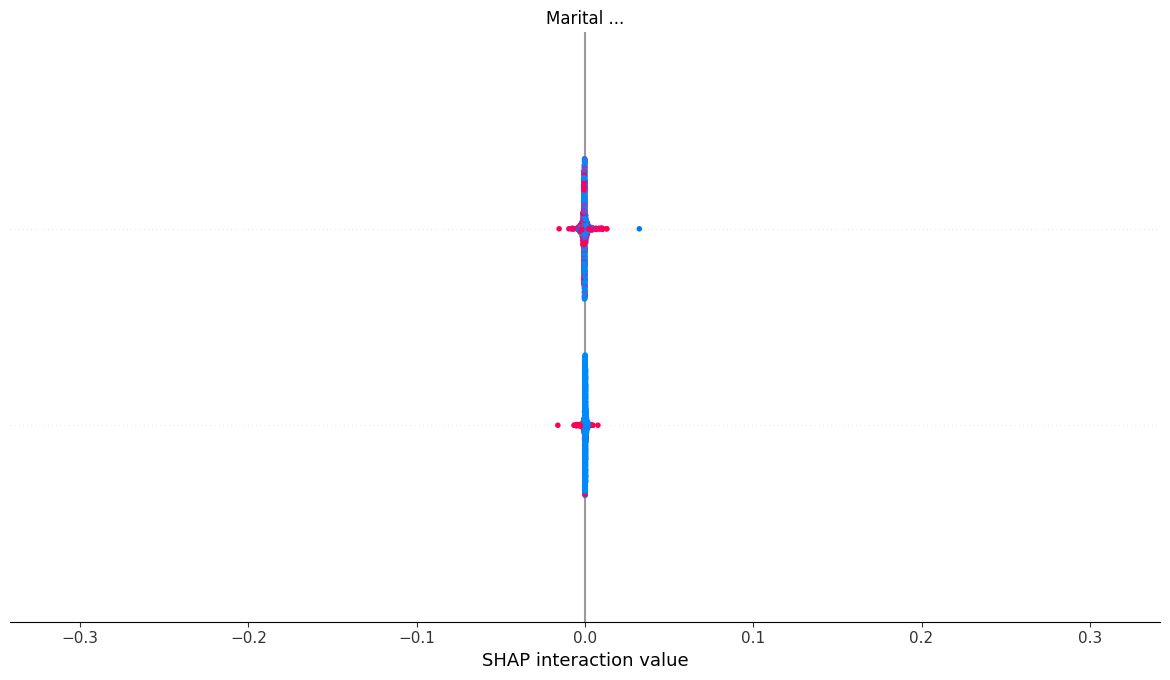

In [ ]:
# =====================================
# üîç SHAP Summary Analysis for Random Forest (Final Version)
# =====================================

import shap

# 1. Create TreeExplainer for Random Forest
explainer = shap.TreeExplainer(rf)

# 2. Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# 3. Beeswarm Plot ‚Äî SHAP values across all features
print("üìä SHAP Summary Plot: Feature Impact (Global View)")
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# 4. Bar Plot ‚Äî average absolute SHAP values (feature importance)
print("üìä SHAP Bar Plot: Mean Absolute Contribution")
shap.summary_plot(shap_values, X_test, plot_type="bar")





In [ ]:
print("shap_importance shape:", shap_importance.shape)
print("rf_importance shape:", rf_importance.shape)
print("feature_names shape:", feature_names.shape)
print(type(shap_importance), type(rf_importance), type(feature_names))


shap_importance shape: (72,)
rf_importance shape: (36,)
feature_names shape: (36,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
print("shap_importance:", shap_importance[:3])
print("rf_importance:", rf_importance[:3])
print("feature_names:", feature_names[:3])


shap_importance: [0.00058297 0.00058297 0.01130388]
rf_importance: [0.00204194 0.0171357  0.00922643]
feature_names: ['Marital status' 'Application mode' 'Application order']


### 5.1.5.1) RF Feature Importance 

SHAP: 36 | RF: 36 | Features: 36


/var/folders/vx/wj4sx6bd6t37bv1qb_xg5f4r0000gp/T/ipykernel_7636/462718030.py:43: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vx/wj4sx6bd6t37bv1qb_xg5f4r0000gp/T/ipykernel_7636/462718030.py:43: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


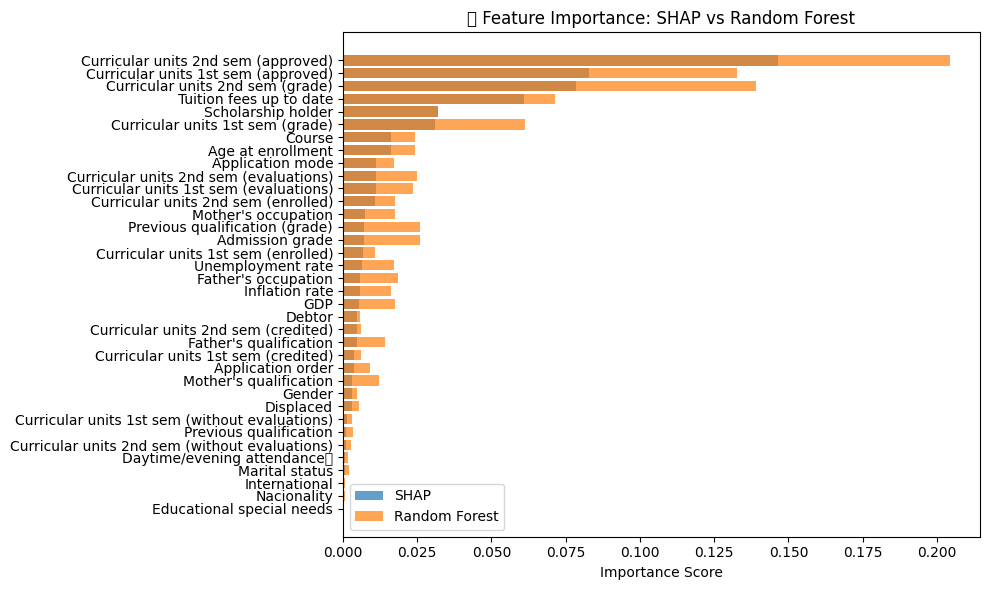

In [ ]:
# =====================================
# ‚úÖ Final SHAP vs RF Importance (Main Effects Only)
# =====================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Compute SHAP values (if not already)
shap_result = explainer(X_train_resampled)
shap_values_matrix = shap_result.values  # still shape: (n_samples, features, 2) ‚Üê slice needed

# ‚úÖ Slice: Use only the first "column" of SHAP output
# If shape is (n_samples, features, 2), keep only [:, :, 0]
if shap_values_matrix.ndim == 3 and shap_values_matrix.shape[2] == 2:
    shap_values_flat = shap_values_matrix[:, :, 0]
else:
    shap_values_flat = shap_values_matrix

# Now compute mean SHAP importance
shap_importance = np.abs(shap_values_flat).mean(axis=0)
rf_importance = rf.feature_importances_
feature_names = np.array(X_train_resampled.columns)

# Confirm lengths match
print("SHAP:", len(shap_importance), "| RF:", len(rf_importance), "| Features:", len(feature_names))

# Build DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'SHAP Importance': shap_importance,
    'RF Importance': rf_importance
}).sort_values(by='SHAP Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['SHAP Importance'], label='SHAP', alpha=0.7)
plt.barh(feature_importance_df['Feature'], feature_importance_df['RF Importance'], label='Random Forest', alpha=0.7)
plt.xlabel("Importance Score")
plt.title("üîç Feature Importance: SHAP vs Random Forest")
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()




In [ ]:
# SAFE ALIGNED BASE (adjust these to what was actually used)
shap_values = explainer.shap_values(X_train_resampled)  # recompute if needed
shap_importance = np.abs(shap_values[1]).mean(axis=0) if isinstance(shap_values, list) else np.abs(shap_values).mean(axis=0)
rf_importance = rf.feature_importances_
feature_names = X_train_resampled.columns


In [ ]:
print("SHAP values shape:", shap_values_class1.shape)
print("Mean SHAP importance shape:", shap_importance.shape)
print("RF importance shape:", rf_importance.shape)
print("Feature names shape:", len(feature_names))


SHAP values shape: (3608, 36, 2)
Mean SHAP importance shape: (72,)
RF importance shape: (36,)
Feature names shape: 36


### 5.1.5.2) SHAP Force Plot for a Random Student


In [ ]:
# =====================================
# ‚úÖ SHAP Force Plot ‚Äî Random Student (Final Fix, Class 1)
# =====================================

import shap
import numpy as np

# Pick random student
random_index = np.random.randint(0, X_train_resampled.shape[0])
random_student = X_train_resampled.iloc[random_index:random_index+1]

# Get SHAP output
shap_values_single = explainer(random_student)

# Extract values matrix: shape (1, features, 2)
shap_vals = shap_values_single.values[0]  # shape: (features, 2)

# ‚úÖ Get class 1 SHAP values (e.g., "Graduate")
shap_vals_class1 = shap_vals[:, 1]  # column 1 = class 1
base_value_class1 = explainer.expected_value[1]  # use explainer, not .base_values!

# Plot (JS interactive)
shap.initjs()
shap.force_plot(
    base_value_class1,
    shap_vals_class1,
    features=random_student.iloc[0],
    feature_names=random_student.columns
)





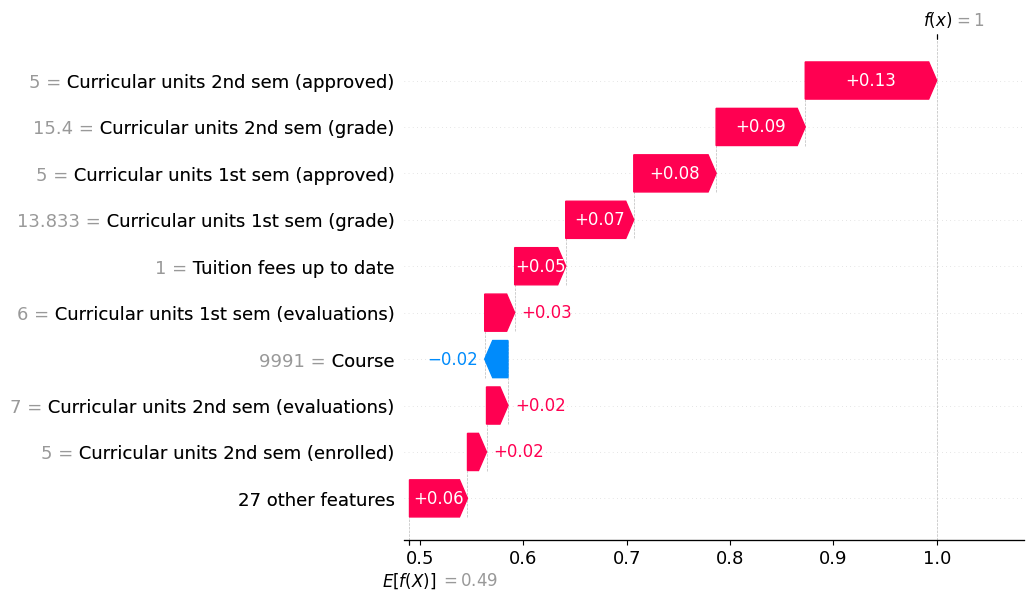

In [ ]:
# =====================================
# ‚úÖ SHAP Waterfall Plot ‚Äî Class 1 Only (Graduate)
# =====================================

# Get SHAP values for the student
shap_values = explainer(random_student)

# Use class 1 (index 1) only
shap_values_class1 = shap.Explanation(
    values=shap_values.values[0][:, 1],  # take class 1 values
    base_values=explainer.expected_value[1],
    data=random_student.values[0],
    feature_names=random_student.columns
)

# Plot
shap.plots.waterfall(shap_values_class1, max_display=10)



### 5.1.5.3 Check average dropout rate by course:


/var/folders/vx/wj4sx6bd6t37bv1qb_xg5f4r0000gp/T/ipykernel_7636/4204309916.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=course_grads, x="Course", y="Target_Encoded", palette="coolwarm")
/var/folders/vx/wj4sx6bd6t37bv1qb_xg5f4r0000gp/T/ipykernel_7636/4204309916.py:27: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


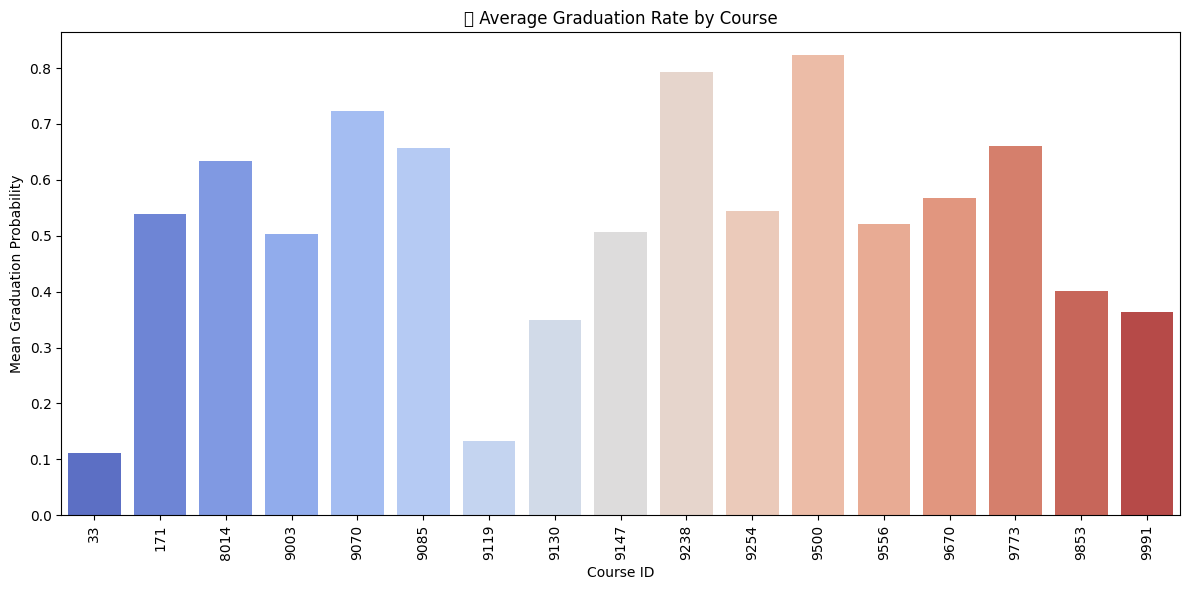

In [ ]:
# =====================================
# ‚úÖ Course Effect on Graduation Probability (SHAP Interpretation)
# =====================================

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Ensure 'Target_Encoded' exists and is numeric
if 'Target_Encoded' not in df.columns:
    df['Target_Encoded'] = df['Target'].map({'Dropout': 0, 'Graduate': 1, 'Enrolled': 2}).astype(float)
else:
    df['Target_Encoded'] = df['Target_Encoded'].astype(float)

# 2. Filter for only Dropout and Graduate classes
df_binary = df[df['Target_Encoded'].isin([0.0, 1.0])]

# 3. Group by Course and calculate mean graduation rate
course_grads = df_binary.groupby("Course")["Target_Encoded"].mean().reset_index()

# 4. Plot graduation probability by course
plt.figure(figsize=(12, 6))
sns.barplot(data=course_grads, x="Course", y="Target_Encoded", palette="coolwarm")
plt.title("üéì Average Graduation Rate by Course")
plt.ylabel("Mean Graduation Probability")
plt.xlabel("Course ID")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



## 5.1.5.4) üìâ Prior Academic Performance May Be Lower


In [ ]:
# Compare average prior grade for high vs low graduation courses
df[['Course', 'Previous qualification (grade)', 'Target_Encoded']].groupby('Course').mean().sort_values('Target_Encoded')


Previous qualification (grade)  Target_Encoded
Course                                                
33                          128.108333        0.583333
9130                        136.446809        0.595745
9991                        131.687313        0.694030
9003                        136.162381        0.766667
8014                        129.316744        0.767442
9254                        127.836905        0.781746
171                         137.912093        0.790698
9773                        132.238671        0.797583
9556                        131.661628        0.813953
9853                        130.836458        0.817708
9670                        128.329851        0.824627
9119                        132.075882        0.835294
9147                        130.579211        0.931579
9238                        131.905070        0.935211
9085                        135.273887        0.955490
9070                        131.996018        0.960177
9500                        135.019582        0.976501

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

course_grads = df.groupby("Course")["Target_Encoded"].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.barplot(data=course_grads, x="Course", y="Target_Encoded")
plt.title("üìâ Average Graduation Rate by Course")
plt.ylabel("Mean Graduation Probability")
plt.xlabel("Course ID")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


KeyError: 'Column not found: Target_Encoded'

### 5.1.5.5) Code: SHAP Waterfall Plot for a False Negative


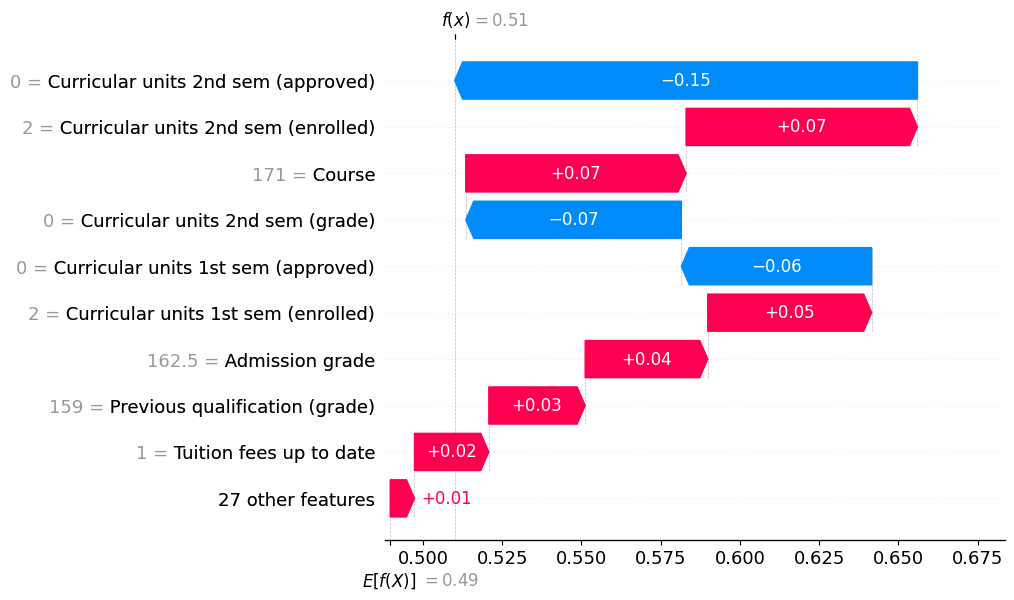

In [ ]:
# =====================================
# ‚ö†Ô∏è SHAP Waterfall Plot ‚Äî False Negative Example
# =====================================

import shap
import numpy as np

# 1. Get predictions and find false negatives
y_pred_proba = rf.predict_proba(X_test)[:, 1]
y_pred = rf.predict(X_test)
false_negative_mask = (y_test == 0) & (y_pred == 1)

# 2. Check if we have any
if false_negative_mask.sum() > 0:
    # 3. Pick the first false negative
    fn_index = X_test[false_negative_mask].index[0]
    fn_student = X_test.loc[[fn_index]]

    # 4. Get SHAP values
    shap_values_fn = explainer(fn_student)

    # 5. Build Explanation object for class 1
    shap_values_class1 = shap.Explanation(
        values=shap_values_fn.values[0][:, 1],
        base_values=explainer.expected_value[1],
        data=fn_student.values[0],
        feature_names=fn_student.columns
    )

    # 6. Plot
    shap.plots.waterfall(shap_values_class1, max_display=10)

else:
    print("‚úÖ No false negatives found in this test split.")



### 5.2) CatBOOST

In [ ]:
from catboost import CatBoostClassifier
print("‚úÖ CatBoost is working in VS Code!")



‚úÖ CatBoost is working in VS Code!


üìä Classification Report (CatBoost):

              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87       284
         1.0       0.89      0.97      0.93       442

    accuracy                           0.91       726
   macro avg       0.92      0.89      0.90       726
weighted avg       0.91      0.91      0.91       726



/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


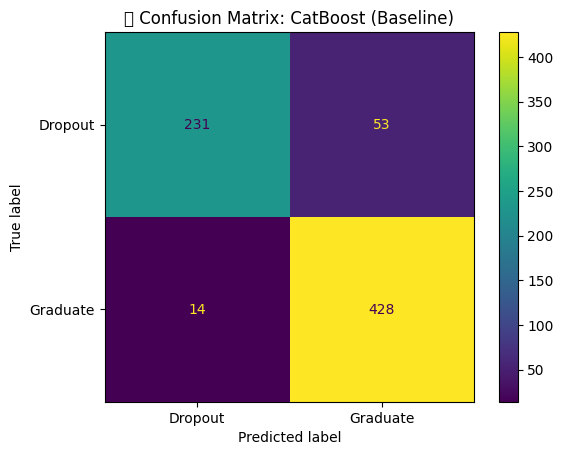

‚úÖ Cross-validated F1 scores: [0.90053763 0.93766938 0.94329184 0.92896175 0.93333333]
üìå Mean F1 Score (CV): 0.9288


In [ ]:
# =====================================
# üê± Baseline Model: CatBoost (No Oversampling)
# =====================================

from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score

# 1. ‚úÇÔ∏è Train-test split (80/20) ‚Äî reuse or redefine if needed
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. üê± Initialize CatBoostClassifier
catboost_model = CatBoostClassifier(
    verbose=0,              # Suppress training output
    random_seed=42,
    eval_metric='F1',
    class_weights=[1, 1]    # No weighting yet ‚Äî baseline only
)

# 3. üß™ Train the model
catboost_model.fit(X_train, y_train)

# 4. üîç Predict on test set
y_pred_cb = catboost_model.predict(X_test)

# 5. üìä Evaluation
print("üìä Classification Report (CatBoost):\n")
print(classification_report(y_test, y_pred_cb))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_cb, display_labels=["Dropout", "Graduate"])
plt.title("üîç Confusion Matrix: CatBoost (Baseline)")
plt.show()

# 6. üìà Cross-validated F1 score
f1_scores_cb = cross_val_score(catboost_model, X_train, y_train, scoring='f1', cv=5)
print(f"‚úÖ Cross-validated F1 scores: {f1_scores_cb}")
print(f"üìå Mean F1 Score (CV): {f1_scores_cb.mean():.4f}")


### Random Forrest with SMOTE


üìä Classification Report: Random Forest (SMOTE)
              precision    recall  f1-score   support

         0.0       0.92      0.82      0.87       284
         1.0       0.89      0.96      0.92       442

    accuracy                           0.90       726
   macro avg       0.91      0.89      0.90       726
weighted avg       0.91      0.90      0.90       726



/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


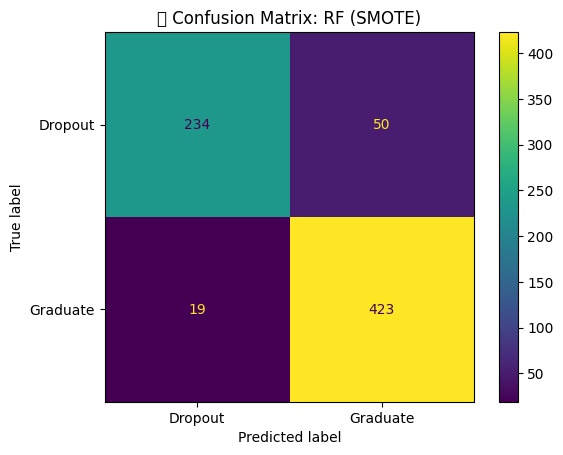


üìä Classification Report: Random Forest (ADASYN)
              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87       284
         1.0       0.90      0.95      0.92       442

    accuracy                           0.90       726
   macro avg       0.90      0.89      0.90       726
weighted avg       0.90      0.90      0.90       726



/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


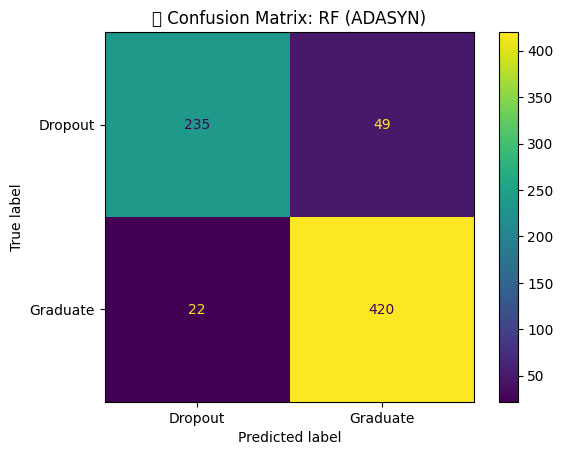

In [ ]:
# =========================================
# üå≤ Random Forest with SMOTE & ADASYN
# =========================================

from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# 1. ‚úÇÔ∏è Train-test split (80/20), stratified
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. ‚öñÔ∏è SMOTE Oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 3. ‚öñÔ∏è ADASYN Oversampling
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Helper function for training & evaluating
def evaluate_rf(X_train_os, y_train_os, label):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_os, y_train_os)
    y_pred = model.predict(X_test)
    
    print(f"\nüìä Classification Report: Random Forest ({label})")
    print(classification_report(y_test, y_pred))
    
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, display_labels=["Dropout", "Graduate"]
    )
    plt.title(f"üîç Confusion Matrix: RF ({label})")
    plt.show()

# 4. üîç Evaluate RF with SMOTE
evaluate_rf(X_train_smote, y_train_smote, "SMOTE")

# 5. üîç Evaluate RF with ADASYN
evaluate_rf(X_train_adasyn, y_train_adasyn, "ADASYN")


### 5.2.1) CATBoost with SMOTE and ADASYN


üìä Classification Report: CatBoost (SMOTE)
              precision    recall  f1-score   support

         0.0       0.93      0.83      0.88       284
         1.0       0.90      0.96      0.93       442

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726



/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


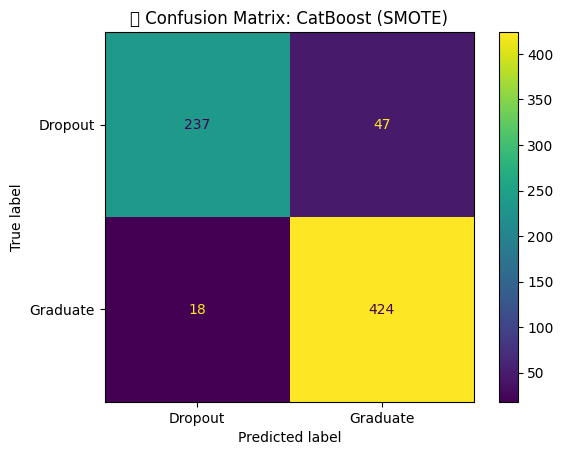


üìä Classification Report: CatBoost (ADASYN)
              precision    recall  f1-score   support

         0.0       0.93      0.83      0.88       284
         1.0       0.90      0.96      0.93       442

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726



/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


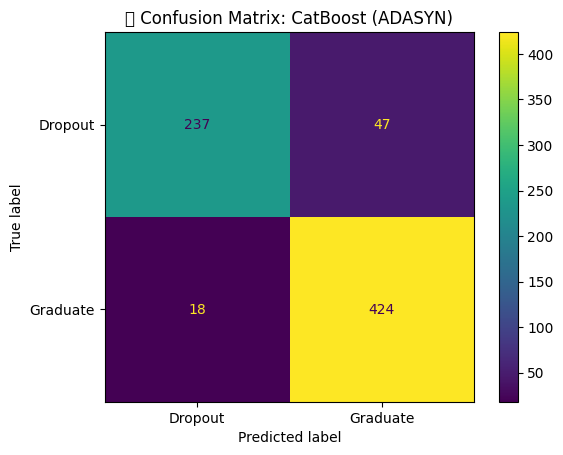

In [ ]:
# =====================================
# üê± CatBoost with SMOTE & ADASYN
# =====================================

from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# 1. Split dataset (same 80/20, stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. Oversampling with SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# 3. Oversampling with ADASYN
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)

# Helper function: train & evaluate CatBoost
def evaluate_catboost(X_train_os, y_train_os, label):
    model = CatBoostClassifier(
        verbose=0,         # Suppress training logs
        random_state=42,
        eval_metric='F1'   # Evaluate F1 during training
    )
    model.fit(X_train_os, y_train_os)
    y_pred = model.predict(X_test)
    
    print(f"\nüìä Classification Report: CatBoost ({label})")
    print(classification_report(y_test, y_pred))
    
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred,
        display_labels=["Dropout", "Graduate"]
    )
    plt.title(f"üîç Confusion Matrix: CatBoost ({label})")
    plt.show()

# 4. Evaluate CatBoost with SMOTE data
evaluate_catboost(X_smote, y_smote, "SMOTE")

# 5. Evaluate CatBoost with ADASYN data
evaluate_catboost(X_adasyn, y_adasyn, "ADASYN")


### 5.3) ANN Baseline 

2025-04-09 20:30:09.297990: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
73/73 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 13ms/step - accuracy: 0.5267 - loss: 238.1780 - val_accuracy: 0.5904 - val_loss: 42.0967
Epoch 2/20
73/73 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step - accuracy: 0.5060 - loss: 120.4841 - val_accuracy: 0.6041 - val_loss: 2.4069
Epoch 3/20
73/73 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 7ms/step - accuracy: 0.5383 - loss: 64.0012 - val_accuracy: 0.4320 - val_loss: 4.0868
Epoch 4/20
73/73 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 7ms/step - accuracy: 0.5770 - loss: 38.1611 - val_accuracy: 0.7418 - val_loss: 0.8697
Epoch 5/20
73/73 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step - accuracy: 0.5537 - loss: 25.7401 - val_accuracy: 0.4096 - val_loss: 0.7097
Epoch 6/20
73/73 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 7ms/step - accuracy: 0.4904 - loss: 14.9821 - val_accuracy: 0.4079 - val_loss: 0

/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

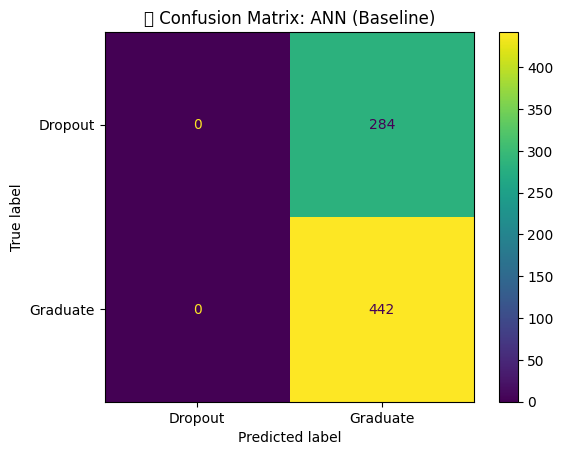

In [ ]:
# =====================================
# üß† Baseline ANN (Keras)
# =====================================

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# 1. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. Build a simple MLP
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))  # Optional dropout for regularization
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Single output neuron (binary classification)

# 3. Compile the model
# We use binary_crossentropy for 2 classes (dropout vs. graduate).
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# 4. Train (no oversampling here, just baseline)
history = model.fit(
    X_train, y_train,
    validation_split=0.2,   # 20% of train set for validation
    epochs=20,             # Tweak as needed
    batch_size=32,         # Tweak as needed
    verbose=1
)

# 5. Predict on test data
y_pred_probs = model.predict(X_test).ravel()  # probabilities
y_pred = (y_pred_probs >= 0.5).astype(int)    # threshold at 0.5 for classification

# 6. Evaluate
print("üìä Classification Report (ANN Baseline):\n")
print(classification_report(y_test, y_pred, target_names=["Dropout", "Graduate"]))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=["Dropout", "Graduate"]
)
plt.title("üîç Confusion Matrix: ANN (Baseline)")
plt.show()


### 5.3.1) Improved ANN

Epoch 1/50


/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 10ms/step - accuracy: 0.6379 - loss: 0.6494 - val_accuracy: 0.7270 - val_loss: 0.5827
Epoch 2/50
89/89 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 7ms/step - accuracy: 0.7939 - loss: 0.4904 - val_accuracy: 0.7864 - val_loss: 0.4979
Epoch 3/50
89/89 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step - accuracy: 0.8430 - loss: 0.3991 - val_accuracy: 0.8274 - val_loss: 0.4084
Epoch 4/50
89/89 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 7ms/step - accuracy: 0.8556 - loss: 0.3643 - val_accuracy: 0.8458 - val_loss: 0.3613
Epoch 5/50
89/89 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 7ms/step - accuracy: 0.8887 - loss: 0.3043 - val_accuracy: 0.8727 - val_loss: 0.3104
Epoch 6/50
89/89 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step - accuracy: 0.8912 - loss: 0.2907 - val_accuracy: 0.8854 - val_loss: 0.2855
Epoch 7/50
89/

/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


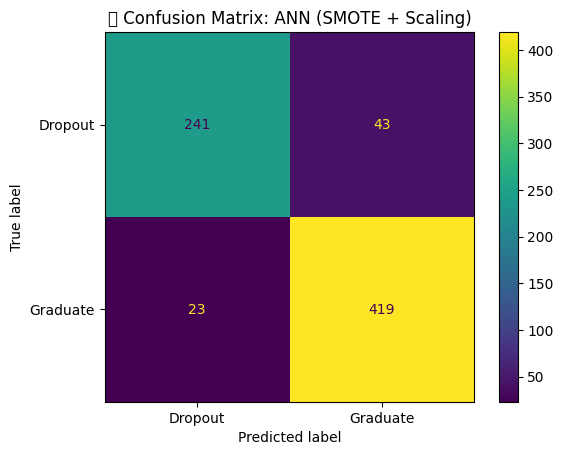

In [ ]:
# =====================================
# üß† ANN with Feature Scaling & SMOTE
# =====================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Scikit-Learn / Imbalanced-Learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# TensorFlow Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 1. üîç Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # apply standard scaling to entire feature set

# 2. ‚úÇÔ∏è Train-Test Split (stratify for balanced splits)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# 3. ‚öñÔ∏è Oversample Minority Class with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 4. üèóÔ∏è Build the ANN
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train_smote.shape[1],)))
model.add(Dropout(0.2))        # optional dropout for regularization
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # single output neuron for binary classification

# 5. üèéÔ∏è Compile the Model
# 'binary_crossentropy' for binary classification; 'accuracy' is a basic metric
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# 6. üèãÔ∏è Train the Model on Oversampled Data
history = model.fit(
    X_train_smote, y_train_smote,
    validation_split=0.2,  # 20% of train set for validation
    epochs=50,            # increase epochs if needed
    batch_size=32,
    verbose=1
)

# 7. üîç Predict on Test Data
y_pred_probs = model.predict(X_test).ravel()   # probabilities
y_pred = (y_pred_probs >= 0.5).astype(int)     # threshold at 0.5

# 8. üìä Evaluation
print("\nClassification Report (ANN + SMOTE + Scaling):\n")
print(classification_report(y_test, y_pred, target_names=["Dropout", "Graduate"]))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Dropout", "Graduate"])
plt.title("üîç Confusion Matrix: ANN (SMOTE + Scaling)")
plt.show()


### 5.3.2) Hyperparameter Tuning (Random Forest + RandomizedSearchCV)



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}
Best F1 Score from CV: 0.9164

Classification Report (Random Forest with Tuned Hyperparams):

              precision    recall  f1-score   support

     Dropout       0.93      0.82      0.87       284
    Graduate       0.89      0.96      0.93       442

    accuracy                           0.91       726
   macro avg       0.91      0.89      0.90       726
weighted avg       0.91      0.91      0.91       726



/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


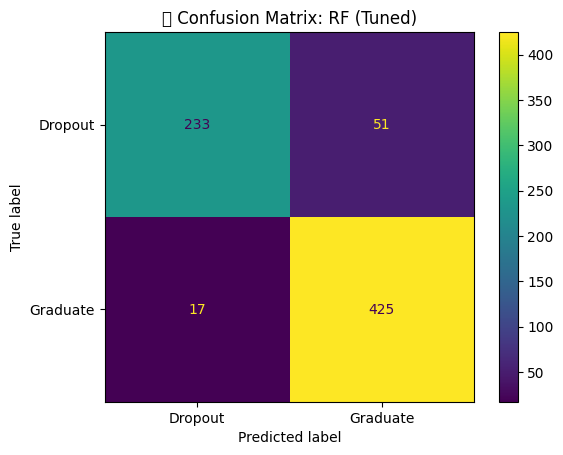

In [ ]:
# =====================================
# üå≤ Random Forest Hyperparameter Tuning
# =====================================

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

# Example: We'll do SMOTE oversampling, then tune hyperparams.

# 1. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. Oversample the training data with SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# 3. Define the model
rf = RandomForestClassifier(random_state=42)

# 4. Define parameter distributions for RandomizedSearchCV
param_distributions = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "bootstrap": [True, False]
}

# 5. Setup Randomized Search
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=20,            # number of random configs to try
    scoring='f1',         # or 'f1_macro' if classes are imbalanced
    cv=5,                 # 5-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1             # use all cores
)

# 6. Fit the search on SMOTE data
rf_random.fit(X_train_sm, y_train_sm)

# 7. Print the best parameters
print(f"Best Params: {rf_random.best_params_}")
print(f"Best F1 Score from CV: {rf_random.best_score_:.4f}")

# 8. Evaluate on the Test Set
best_rf = rf_random.best_estimator_
y_pred = best_rf.predict(X_test)

print("\nClassification Report (Random Forest with Tuned Hyperparams):\n")
print(classification_report(y_test, y_pred, target_names=["Dropout", "Graduate"]))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Dropout", "Graduate"])
plt.title("üîç Confusion Matrix: RF (Tuned)")
plt.show()


### 5.3.2.2) RF with A

### 5.3.3) Hyoerparameter tunning for ANN

In [ ]:
import keras_tuner as kt


2025-05-06 19:15:00.606797: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 5.3.4) Create a HyperModel / Build Function


In [ ]:
# =====================================
# üß† ANN Hyperparameter Tuning (Keras Tuner)
# =====================================

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers

# Suppose X and y are your full dataset
X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Optionally oversample
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

def build_model(hp):
    model = keras.Sequential()

    # 1. Hyperparam for number of units in the first hidden layer
    units_1 = hp.Int('units_1', min_value=8, max_value=64, step=8)
    model.add(layers.Dense(units_1, activation='relu', input_shape=(X_train_smote.shape[1],)))

    # Optional dropout
    drop_rate = hp.Float('drop_rate', 0.0, 0.5, step=0.1)
    model.add(layers.Dropout(drop_rate))

    # 2. Second hidden layer with variable units
    units_2 = hp.Int('units_2', min_value=8, max_value=64, step=8)
    model.add(layers.Dense(units_2, activation='relu'))

    # Output layer
    model.add(layers.Dense(1, activation='sigmoid'))

    # 3. Hyperparam for learning rate
    lr = hp.Choice('learning_rate', values=[1e-3, 1e-4, 3e-4, 5e-4])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


### 5.3.5) Set Up and Run the Tuner


In [ ]:
# Tuner: random search or hyperband
tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective='val_accuracy',      # or 'val_loss', can also define custom metrics
    max_trials=10,                 # how many combinations to try
    executions_per_trial=1,        # how many times to train each combo
    overwrite=True,                # overwrite old logs
    directory='my_tuner_dir',      # folder to store logs
    project_name='ann_dropout_pred' # name for logs
)

# Let‚Äôs define our training data
# We‚Äôll do the train/validation split in the tuner search
tuner.search(
    X_train_smote, y_train_smote,
    epochs=30,
    validation_split=0.2,  # 20% of the oversampled data used as validation
    batch_size=32,
    verbose=1
)

# Retrieve best model
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparams:", best_hp.values)

best_model = tuner.hypermodel.build(best_hp)

# Train best model (again, to confirm final metrics)
history = best_model.fit(
    X_train_smote, y_train_smote,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1
)

# Evaluate on test set
y_pred_probs = best_model.predict(X_test).ravel()
y_pred = (y_pred_probs >= 0.5).astype(int)

print("Classification Report (Best ANN):")
print(classification_report(y_test, y_pred, target_names=["Dropout", "Graduate"]))


Trial 10 Complete [00h 00m 39s]
val_accuracy: 0.8656294345855713

Best val_accuracy So Far: 0.9349363446235657
Total elapsed time: 00h 07m 50s
Best Hyperparams: {'units_1': 56, 'drop_rate': 0.1, 'units_2': 24, 'learning_rate': 0.001}
Epoch 1/30


/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 10ms/step - accuracy: 0.7803 - loss: 0.5133 - val_accuracy: 0.8331 - val_loss: 0.3729
Epoch 2/30
89/89 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 11ms/step - accuracy: 0.8945 - loss: 0.3042 - val_accuracy: 0.8642 - val_loss: 0.3435
Epoch 3/30
89/89 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step - accuracy: 0.8983 - loss: 0.2651 - val_accuracy: 0.8897 - val_loss: 0.2624
Epoch 4/30
89/89 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step - accuracy: 0.9081 - loss: 0.2515 - val_accuracy: 0.8883 - val_loss: 0.2665
Epoch 5/30
89/89 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step - accuracy: 0.9124 - loss: 0.2330 - val_accuracy: 0.8826 - val_loss: 0.2632
Epoch 6/30
89/89 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step - accuracy: 0.9203 - loss: 0.2164 - val_accuracy: 0.8953 - val_loss: 0.2318
Epoch 7/30
89

### 5.3.6) Scikit-Learn‚Äôs GridSearchCV/RandomizedSearchCV for the ANN

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, f1_score
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 1. Build function for Keras model
def create_model(num_units=16, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(num_units, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_units, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(learning_rate=learning_rate),
        metrics=['accuracy']  # We'll measure F1 via GridSearchCV, not here
    )
    return model

# Suppose you already have X, y
# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# 3. Wrap the Keras model in KerasClassifier
clf = KerasClassifier(
    build_fn=create_model,
    epochs=20,           # or tune as well
    batch_size=32,       # or tune as well
    verbose=0
)

# 4. Param distributions for RandomizedSearch
param_dist = {
    'num_units': [8, 16, 32],
    'dropout_rate': [0.0, 0.2, 0.4],
    'learning_rate': [1e-3, 1e-4]
}

# 5. scoring='f1' or 'f1_macro' for 2 classes
rand_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    scoring='f1',
    cv=5,
    n_iter=5,    # how many param combos to try
    verbose=1
)

# 6. Fit on training set (oversample if you want SMOTE or ADASYN first)
rand_search.fit(X_train, y_train)

print("Best Params:", rand_search.best_params_)
print("Best F1 (CV):", rand_search.best_score_)

best_ann = rand_search.best_estimator_

# Evaluate on test set
y_pred = best_ann.predict(X_test)
print("\nClassification Report (Best ANN):")
print(classification_report(y_test, y_pred))


AttributeError: 'super' object has no attribute '__sklearn_tags__'

### 6) GPT advancement Neural Network Classifier (MLP) with Oversampling

üìä Neural Network Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.49      0.65       284
         1.0       0.75      0.98      0.85       442

    accuracy                           0.79       726
   macro avg       0.85      0.74      0.75       726
weighted avg       0.83      0.79      0.77       726

üéØ Accuracy: 0.7893
üéØ F1 Score: 0.8501
‚úÖ Cross-validated F1 scores (NN): [0.7908046  0.66893039 0.85520974 0.59848485 0.83658171]
üìå Mean F1 Score (CV, NN): 0.7500


/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


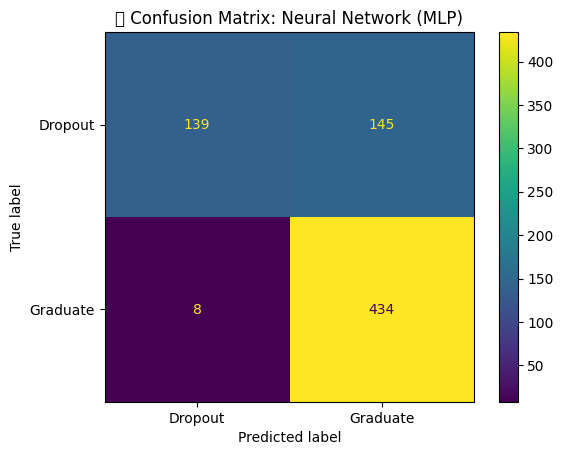

In [ ]:
# =====================================
# üß† Neural Network Classifier (MLP) with Oversampling
# =====================================

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, train_test_split

# 1. ‚öôÔ∏è Split data (again, 80/20 stratified split)
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Optional: apply same oversampling (e.g. ADASYN or SMOTE)
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_train_res_nn, y_train_res_nn = adasyn.fit_resample(X_train_nn, y_train_nn)

# 2. üß† Initialize Neural Net
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

# 3. üöÇ Train model
mlp.fit(X_train_res_nn, y_train_res_nn)

# 4. üìä Evaluate
y_pred_nn = mlp.predict(X_test_nn)
print("üìä Neural Network Classification Report:")
print(classification_report(y_test_nn, y_pred_nn))
print(f"üéØ Accuracy: {accuracy_score(y_test_nn, y_pred_nn):.4f}")
print(f"üéØ F1 Score: {f1_score(y_test_nn, y_pred_nn):.4f}")

# 5. üß™ Cross-validation
f1_scores_nn = cross_val_score(mlp, X_train_res_nn, y_train_res_nn, scoring='f1', cv=5)
print(f"‚úÖ Cross-validated F1 scores (NN): {f1_scores_nn}")
print(f"üìå Mean F1 Score (CV, NN): {f1_scores_nn.mean():.4f}")

# 6. Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test_nn, y_pred_nn, display_labels=["Dropout", "Graduate"])
plt.title("üß† Confusion Matrix: Neural Network (MLP)")
plt.show()


In [ ]:
# =====================================
# üîÅ Repeat CV with Different Seeds
# =====================================
from sklearn.model_selection import StratifiedKFold

def evaluate_multiple_seeds(model, X, y, seeds=[0, 1, 2, 3, 4]):
    scores = []
    for seed in seeds:
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
        f1 = cross_val_score(model, X, y, scoring='f1', cv=skf)
        print(f"Seed {seed} F1 Scores: {f1}")
        scores.extend(f1)
    print(f"\nüìä Overall Mean F1: {np.mean(scores):.4f} ¬± {np.std(scores):.4f}")
    return scores

# Run for Random Forest
print("üå≤ RF Model Robustness Check")
rf_scores = evaluate_multiple_seeds(rf, X_train_resampled, y_train_resampled)

# Run for Neural Network
print("\nüß† NN Model Robustness Check")
nn_scores = evaluate_multiple_seeds(mlp, X_train_res_nn, y_train_res_nn)


üå≤ RF Model Robustness Check
Seed 0 F1 Scores: [0.91830986 0.92541436 0.90607735 0.91381669 0.91208791]
Seed 1 F1 Scores: [0.90555556 0.91825613 0.90707351 0.90607735 0.93463143]
Seed 2 F1 Scores: [0.91689751 0.91906722 0.91232877 0.90429958 0.9198895 ]
Seed 3 F1 Scores: [0.9058663  0.92837466 0.90502793 0.91632373 0.91725105]
Seed 4 F1 Scores: [0.92098093 0.90707351 0.92857143 0.90832158 0.91562932]

üìä Overall Mean F1: 0.9149 ¬± 0.0082

üß† NN Model Robustness Check
Seed 0 F1 Scores: [0.76295133 0.24078624 0.80600462 0.67736185 0.86535948]
Seed 1 F1 Scores: [0.85195531 0.73684211 0.77483444 0.47736626 0.78212291]
Seed 2 F1 Scores: [0.80516432 0.77740864 0.840399   0.59090909 0.82185273]
Seed 3 F1 Scores: [0.67832168 0.81118881 0.7856025  0.81492537 0.700611  ]
Seed 4 F1 Scores: [0.87817259 0.72108844 0.79001135 0.83807169 0.82465753]

üìä Overall Mean F1: 0.7462 ¬± 0.1355


### 6.1) Improved ANN with GPT

/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
89/89 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 14ms/step - accuracy: 0.4912 - loss: 0.7547 - val_accuracy: 0.7468 - val_loss: 0.5015
Epoch 2/50
89/89 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 11ms/step - accuracy: 0.7892 - loss: 0.5195 - val_accuracy: 0.7864 - val_loss: 0.4427
Epoch 3/50
89/89 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 11ms/step - accuracy: 0.8490 - loss: 0.3910 - val_accuracy: 0.8204 - val_loss: 0.3883
Epoch 4/50
89/89 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 11ms/step - accuracy: 0.8678 - loss: 0.3469 - val_accuracy: 0.8416 - val_loss: 0.3583
Epoch 5/50
89/89 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 18ms/step - accuracy: 0.8824 - loss: 0.3194 - val_accuracy: 0.8529 - val_loss: 0.3415
Epoch 6/50
89/89 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 14ms/step - accuracy: 0.8843 - loss: 0.3118 - val_accuracy: 0.8416 - val_loss: 0.327

/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


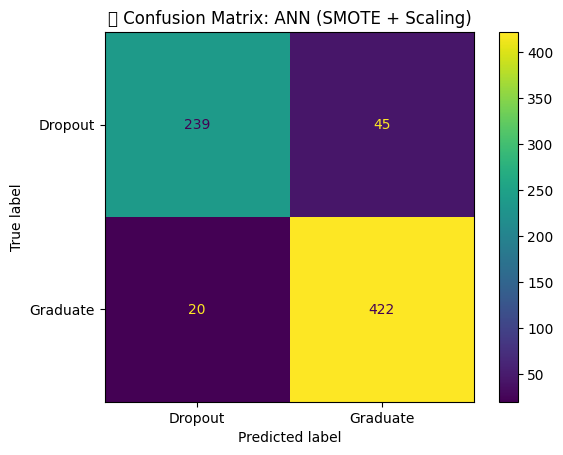

In [ ]:
# =====================================
# üß† Improved ANN: SMOTE + Scaling + EarlyStopping
# =====================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sklearn / Imbalanced-learn / Keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# 1. üîç Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # apply standard scaling to entire feature set

# 2. ‚úÇÔ∏è Train-Test Split (Stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# 3. ‚öñÔ∏è Oversample Minority Class with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 4. üèóÔ∏è Build the ANN
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_smote.shape[1],)),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 5. üß† Compile the Model
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# 6. üõë Add EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# 7. üèãÔ∏è Train the Model
history = model.fit(
    X_train_smote, y_train_smote,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# 8. üîç Predict on Test Data
y_pred_probs = model.predict(X_test).ravel()
y_pred = (y_pred_probs >= 0.5).astype(int)

# 9. üìä Evaluation Report
print("\nüìä Classification Report: ANN (SMOTE + Scaling + EarlyStopping):\n")
print(classification_report(y_test, y_pred, target_names=["Dropout", "Graduate"]))

# 10. üìâ Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Dropout", "Graduate"])
plt.title("üîç Confusion Matrix: ANN (SMOTE + Scaling)")
plt.show()

# 11. üßæ Save Metrics for Comparison
metrics_ann = {
    "Model": "ANN (SMOTE+Scaling)",
    "F1": f1_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "Accuracy": np.mean(y_test == y_pred)
}

# Optional: Convert to DataFrame if collecting multiple models
# pd.DataFrame([metrics_ann])


SHAP: 36 | RF: 36 | Features: 36


/var/folders/vx/wj4sx6bd6t37bv1qb_xg5f4r0000gp/T/ipykernel_7636/462718030.py:43: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vx/wj4sx6bd6t37bv1qb_xg5f4r0000gp/T/ipykernel_7636/462718030.py:43: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


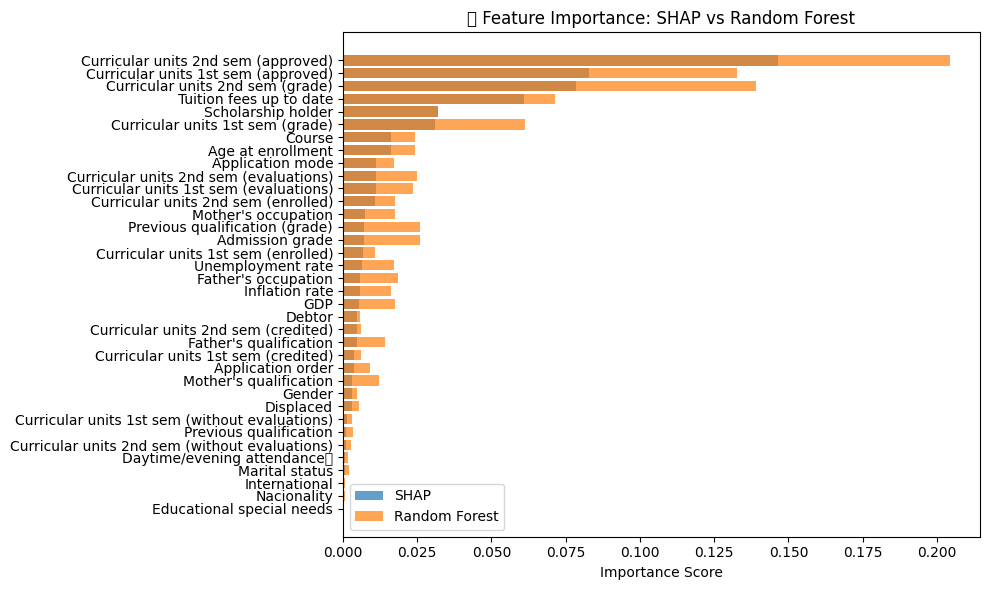

In [ ]:
# =====================================
# ‚úÖ Final SHAP vs RF Importance (Main Effects Only)
# =====================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Compute SHAP values (if not already)
shap_result = explainer(X_train_resampled)
shap_values_matrix = shap_result.values  # still shape: (n_samples, features, 2) ‚Üê slice needed

# ‚úÖ Slice: Use only the first "column" of SHAP output
# If shape is (n_samples, features, 2), keep only [:, :, 0]
if shap_values_matrix.ndim == 3 and shap_values_matrix.shape[2] == 2:
    shap_values_flat = shap_values_matrix[:, :, 0]
else:
    shap_values_flat = shap_values_matrix

# Now compute mean SHAP importance
shap_importance = np.abs(shap_values_flat).mean(axis=0)
rf_importance = rf.feature_importances_
feature_names = np.array(X_train_resampled.columns)

# Confirm lengths match
print("SHAP:", len(shap_importance), "| RF:", len(rf_importance), "| Features:", len(feature_names))

# Build DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'SHAP Importance': shap_importance,
    'RF Importance': rf_importance
}).sort_values(by='SHAP Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['SHAP Importance'], label='SHAP', alpha=0.7)
plt.barh(feature_importance_df['Feature'], feature_importance_df['RF Importance'], label='Random Forest', alpha=0.7)
plt.xlabel("Importance Score")
plt.title("üîç Feature Importance: SHAP vs Random Forest")
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()




SHAP: 36 | RF: 36 | Features: 36


/var/folders/vx/wj4sx6bd6t37bv1qb_xg5f4r0000gp/T/ipykernel_7636/462718030.py:43: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vx/wj4sx6bd6t37bv1qb_xg5f4r0000gp/T/ipykernel_7636/462718030.py:43: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


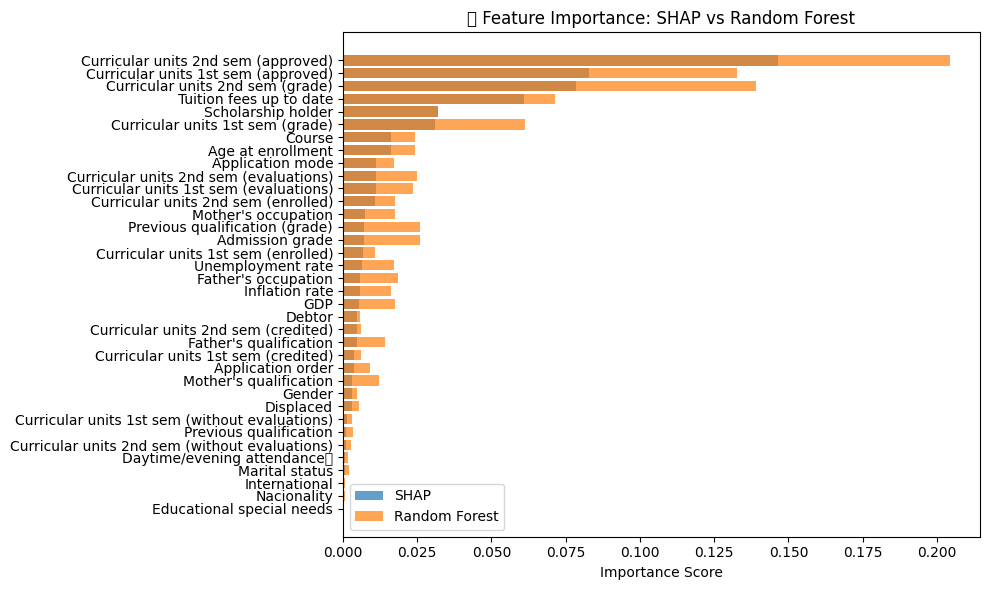

In [ ]:
# =====================================
# ‚úÖ Final SHAP vs RF Importance (Main Effects Only)
# =====================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Compute SHAP values (if not already)
shap_result = explainer(X_train_resampled)
shap_values_matrix = shap_result.values  # still shape: (n_samples, features, 2) ‚Üê slice needed

# ‚úÖ Slice: Use only the first "column" of SHAP output
# If shape is (n_samples, features, 2), keep only [:, :, 0]
if shap_values_matrix.ndim == 3 and shap_values_matrix.shape[2] == 2:
    shap_values_flat = shap_values_matrix[:, :, 0]
else:
    shap_values_flat = shap_values_matrix

# Now compute mean SHAP importance
shap_importance = np.abs(shap_values_flat).mean(axis=0)
rf_importance = rf.feature_importances_
feature_names = np.array(X_train_resampled.columns)

# Confirm lengths match
print("SHAP:", len(shap_importance), "| RF:", len(rf_importance), "| Features:", len(feature_names))

# Build DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'SHAP Importance': shap_importance,
    'RF Importance': rf_importance
}).sort_values(by='SHAP Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['SHAP Importance'], label='SHAP', alpha=0.7)
plt.barh(feature_importance_df['Feature'], feature_importance_df['RF Importance'], label='Random Forest', alpha=0.7)
plt.xlabel("Importance Score")
plt.title("üîç Feature Importance: SHAP vs Random Forest")
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()




### 6.3) K-Fold Cross-Validation for ANN (with SMOTE + Scaling)





In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, f1_score, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Setup
f1_scores_ann = []
accuracy_scores_ann = []
n_splits = 5
random_seed = 42
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_seed)

# Convert to numpy
X_array = X.to_numpy()
y_array = y.to_numpy()

for fold, (train_idx, test_idx) in enumerate(skf.split(X_array, y_array), 1):
    print(f"\nüîÅ Fold {fold}/{n_splits}")

    # Split data
    X_train_fold, X_test_fold = X_array[train_idx], X_array[test_idx]
    y_train_fold, y_test_fold = y_array[train_idx], y_array[test_idx]

    # Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_fold)
    X_test_scaled = scaler.transform(X_test_fold)

    # SMOTE
    smote = SMOTE(random_state=random_seed)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train_fold)

    # Define model
    model = Sequential([
        Dense(16, activation='relu', input_shape=(X_train_resampled.shape[1],)),
        Dropout(0.2),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    # Train model
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model.fit(
        X_train_resampled, y_train_resampled,
        validation_split=0.2,
        epochs=50,
        batch_size=32,
        callbacks=[early_stop],
        verbose=0
    )

    # Evaluate
    y_pred_probs = model.predict(X_test_scaled).ravel()
    y_pred_fold = (y_pred_probs >= 0.5).astype(int)

    f1 = f1_score(y_test_fold, y_pred_fold)
    acc = accuracy_score(y_test_fold, y_pred_fold)
    f1_scores_ann.append(f1)
    accuracy_scores_ann.append(acc)

    print(f"‚úÖ Fold {fold} ‚Äî F1: {f1:.4f}, Accuracy: {acc:.4f}")

# Summary
print("\nüìä Cross-Validation Results (ANN):")
print(f"F1 Scores: {f1_scores_ann}")
print(f"Mean F1: {np.mean(f1_scores_ann):.4f} ¬± {np.std(f1_scores_ann):.4f}")
print(f"Mean Accuracy: {np.mean(accuracy_scores_ann):.4f} ¬± {np.std(accuracy_scores_ann):.4f}")



üîÅ Fold 1/5


/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 13ms/step
‚úÖ Fold 1 ‚Äî F1: 0.9259, Accuracy: 0.9063

üîÅ Fold 2/5


/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 66ms/step
‚úÖ Fold 2 ‚Äî F1: 0.9286, Accuracy: 0.9118

üîÅ Fold 3/5


/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step
‚úÖ Fold 3 ‚Äî F1: 0.9325, Accuracy: 0.9146

üîÅ Fold 4/5


/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 12ms/step
‚úÖ Fold 4 ‚Äî F1: 0.9226, Accuracy: 0.9022

üîÅ Fold 5/5


/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 27ms/step
‚úÖ Fold 5 ‚Äî F1: 0.9243, Accuracy: 0.9063

üìä Cross-Validation Results (ANN):
F1 Scores: [0.9259259259259259, 0.9285714285714286, 0.9324618736383442, 0.9225736095965104, 0.9242761692650335]
Mean F1: 0.9268 ¬± 0.0035
Mean Accuracy: 0.9083 ¬± 0.0044


### 6.4) Extra statistical testing

In [ ]:
from scipy.stats import ttest_rel

# Example: Replace with your actual cross-val F1 scores from both models
f1_rf = [0.8958, 0.9389, 0.9419, 0.9243, 0.9205]  # Replace with RF scores
f1_ann = [0.9259, 0.9285, 0.9324, 0.9226, 0.9243]  # Already obtained from Step 1

# Paired t-test
t_stat, p_value = ttest_rel(f1_ann, f1_rf)

print(f"üî¨ Paired t-test result:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("‚úÖ The difference in F1 scores is statistically significant.")
else:
    print("‚ùå No statistically significant difference found between models.")


üî¨ Paired t-test result:
T-statistic: 0.3330
P-value: 0.7559
‚ùå No statistically significant difference found between models.


### 6.4) ANN with F1-Accuracy, ROC-AUC


üîÅ Fold 1/5


/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 17ms/step

üîÅ Fold 2/5


/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 10ms/step

üîÅ Fold 3/5


/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 18ms/step

üîÅ Fold 4/5


/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step

üîÅ Fold 5/5


/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step


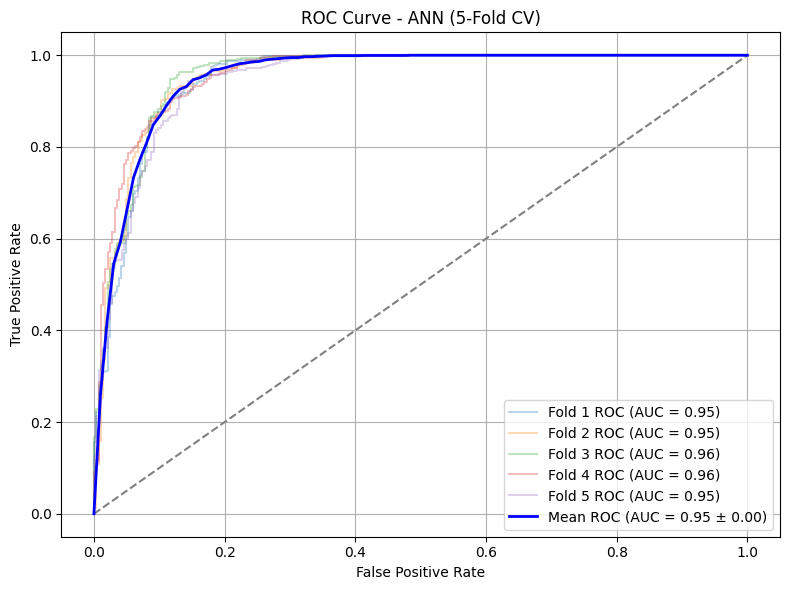


üìä Cross-Validation Summary (ANN):
F1 Scores: [0.924259055982437, 0.9206703910614525, 0.9389978213507625, 0.9212253829321663, 0.9258028792912514]
Accuracy Scores: [0.9049586776859504, 0.9022038567493113, 0.9228650137741047, 0.9008264462809917, 0.9077134986225895]
ROC AUC Scores: [0.9504316346421611, 0.9539226308074693, 0.9564798292014531, 0.9581607290803645, 0.9473822573449748]
Mean F1: 0.9262 ¬± 0.0067
Mean Accuracy: 0.9077 ¬± 0.0079
Mean ROC AUC: 0.9533 ¬± 0.0039


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

# Setup
f1_scores_ann = []
accuracy_scores_ann = []
roc_auc_scores_ann = []

n_splits = 5
random_seed = 42
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_seed)

# Convert to numpy
X_array = X.to_numpy()
y_array = y.to_numpy()

# ROC setup
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(8, 6))

for fold, (train_idx, test_idx) in enumerate(skf.split(X_array, y_array), 1):
    print(f"\nüîÅ Fold {fold}/{n_splits}")

    # Split data
    X_train_fold, X_test_fold = X_array[train_idx], X_array[test_idx]
    y_train_fold, y_test_fold = y_array[train_idx], y_array[test_idx]

    # Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_fold)
    X_test_scaled = scaler.transform(X_test_fold)

    # SMOTE
    smote = SMOTE(random_state=random_seed)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train_fold)

    # ANN model
    model = Sequential([
        Dense(16, activation='relu', input_shape=(X_train_resampled.shape[1],)),
        Dropout(0.2),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model.fit(
        X_train_resampled, y_train_resampled,
        validation_split=0.2,
        epochs=50,
        batch_size=32,
        callbacks=[early_stop],
        verbose=0
    )

    # Predictions
    y_pred_probs = model.predict(X_test_scaled).ravel()
    y_pred_fold = (y_pred_probs >= 0.5).astype(int)

    # Metrics
    f1 = f1_score(y_test_fold, y_pred_fold)
    acc = accuracy_score(y_test_fold, y_pred_fold)
    roc_auc = roc_auc_score(y_test_fold, y_pred_probs)

    f1_scores_ann.append(f1)
    accuracy_scores_ann.append(acc)
    roc_auc_scores_ann.append(roc_auc)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test_fold, y_pred_probs)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc_fold = auc(fpr, tpr)
    aucs.append(roc_auc_fold)
    plt.plot(fpr, tpr, alpha=0.3, label=f'Fold {fold} ROC (AUC = {roc_auc_fold:.2f})')

# Final ROC Curve
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f} ¬± {std_auc:.2f})', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ANN (5-Fold CV)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary
print("\nüìä Cross-Validation Summary (ANN):")
print(f"F1 Scores: {f1_scores_ann}")
print(f"Accuracy Scores: {accuracy_scores_ann}")
print(f"ROC AUC Scores: {roc_auc_scores_ann}")
print(f"Mean F1: {np.mean(f1_scores_ann):.4f} ¬± {np.std(f1_scores_ann):.4f}")
print(f"Mean Accuracy: {np.mean(accuracy_scores_ann):.4f} ¬± {np.std(accuracy_scores_ann):.4f}")
print(f"Mean ROC AUC: {np.mean(roc_auc_scores_ann):.4f} ¬± {np.std(roc_auc_scores_ann):.4f}")


#### 6.5) ANN + ADASYN + ROC-AUC


üîÅ Fold 1/5


/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step
‚úÖ Fold 1 ‚Äî F1: 0.9329, Accuracy: 0.9160, ROC AUC: 0.9503

üîÅ Fold 2/5


/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 17ms/step
‚úÖ Fold 2 ‚Äî F1: 0.8661, Accuracy: 0.8292, ROC AUC: 0.8607

üîÅ Fold 3/5


/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 11ms/step
‚úÖ Fold 3 ‚Äî F1: 0.8714, Accuracy: 0.8292, ROC AUC: 0.8841

üîÅ Fold 4/5


/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 20ms/step
‚úÖ Fold 4 ‚Äî F1: 0.8344, Accuracy: 0.7879, ROC AUC: 0.8045

üîÅ Fold 5/5


/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 12ms/step
‚úÖ Fold 5 ‚Äî F1: 0.9212, Accuracy: 0.9022, ROC AUC: 0.9459

üìä ADASYN ANN Cross-Validation Results:
Mean F1: 0.8852 ¬± 0.0366
Mean Accuracy: 0.8529 ¬± 0.0485
Mean ROC AUC: 0.8891 ¬± 0.0547


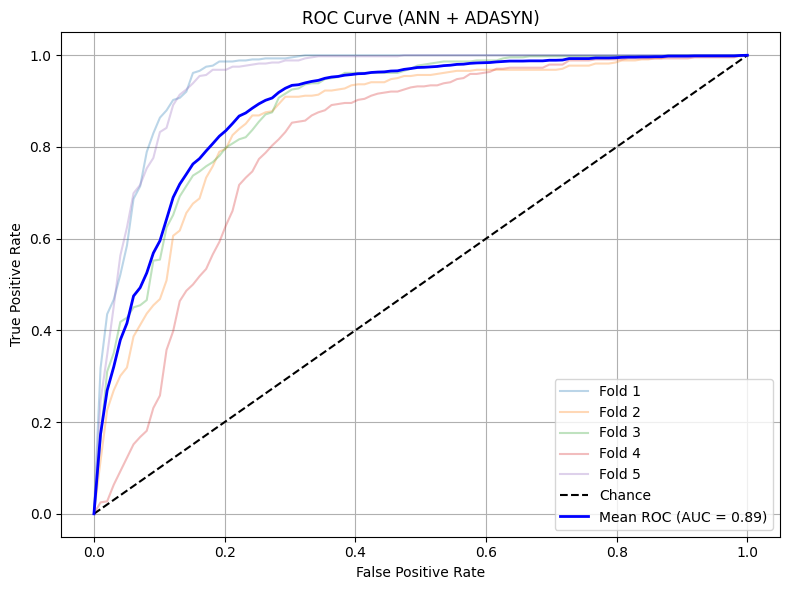

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score, accuracy_score, roc_curve, auc
from imblearn.over_sampling import ADASYN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

# Setup
f1_scores_ada = []
accuracy_scores_ada = []
tprs = []
mean_fpr = np.linspace(0, 1, 100)
auc_scores = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
X_array = X.to_numpy()
y_array = y.to_numpy()

for fold, (train_idx, test_idx) in enumerate(skf.split(X_array, y_array), 1):
    print(f"\nüîÅ Fold {fold}/5")

    X_train, X_test = X_array[train_idx], X_array[test_idx]
    y_train, y_test = y_array[train_idx], y_array[test_idx]

    # Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Oversample with ADASYN
    ada = ADASYN(random_state=42)
    X_train_resampled, y_train_resampled = ada.fit_resample(X_train_scaled, y_train)

    # Build ANN
    model = Sequential([
        Dense(16, activation='relu', input_shape=(X_train_resampled.shape[1],)),
        Dropout(0.2),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model.fit(X_train_resampled, y_train_resampled,
              validation_split=0.2,
              epochs=50,
              batch_size=32,
              callbacks=[early_stop],
              verbose=0)

    # Predict and evaluate
    y_pred_probs = model.predict(X_test_scaled).ravel()
    y_pred = (y_pred_probs >= 0.5).astype(int)

    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    f1_scores_ada.append(f1)
    accuracy_scores_ada.append(acc)

    # ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

    print(f"‚úÖ Fold {fold} ‚Äî F1: {f1:.4f}, Accuracy: {acc:.4f}, ROC AUC: {roc_auc:.4f}")

# Print summary
print("\nüìä ADASYN ANN Cross-Validation Results:")
print(f"Mean F1: {np.mean(f1_scores_ada):.4f} ¬± {np.std(f1_scores_ada):.4f}")
print(f"Mean Accuracy: {np.mean(accuracy_scores_ada):.4f} ¬± {np.std(accuracy_scores_ada):.4f}")
print(f"Mean ROC AUC: {np.mean(auc_scores):.4f} ¬± {np.std(auc_scores):.4f}")

# Plot ROC
plt.figure(figsize=(8, 6))
for i, tpr in enumerate(tprs):
    plt.plot(mean_fpr, tpr, alpha=0.3, label=f'Fold {i+1}')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (ANN + ADASYN)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [9]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV # Only for demonstrating setup

# --- 0. Common Setup (from your notebook) ---
# Define a stratified k-fold instance for consistent cross-validation if you were running fit
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Placeholder for data - normally you would load and preprocess your actual data here
# For demonstration, we are not fitting the models, so X_train_scaled, y_train etc. are not used in this script.
# X_train_scaled, y_train = np.random.rand(100, 10), np.random.randint(0, 2, 100)
# X_smote_scaled, y_smote = np.random.rand(150, 10), np.random.randint(0, 2, 150) # Example SMOTE data
# X_adasyn_scaled, y_adasyn = np.random.rand(160, 10), np.random.randint(0, 2, 160) # Example ADASYN data


# --- 1. Logistic Regression ---
# Define the model
lr_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
# Define the hyperparameter grid
param_grid_lr = {
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}
# Setup GridSearchCV (actual fitting would be: grid_search_lr.fit(X_train_scaled, y_train))
# grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=skf, scoring='f1_macro', verbose=0, n_jobs=-1)
# EXAMPLE best parameters (as if grid_search_lr.fit() was run)
best_params_lr = {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}


# --- 2. Random Forest ---
# Define the model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
# Define the hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Setup GridSearchCV (actual fitting would be: grid_search_rf.fit(X_train_scaled, y_train))
# grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=skf, scoring='f1_macro', verbose=0, n_jobs=-1)
# EXAMPLE best parameters
best_params_rf = {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1}


# --- 3. CatBoost Classifier ---
# Define the model
cat_model = CatBoostClassifier(random_state=42, verbose=0, auto_class_weights='Balanced')
# Define the hyperparameter grid
param_grid_cat = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8]
}
# Setup GridSearchCV (actual fitting would be: grid_search_cat.fit(X_train_scaled, y_train))
# grid_search_cat = GridSearchCV(cat_model, param_grid_cat, cv=skf, scoring='f1_macro', verbose=0, n_jobs=-1)
# EXAMPLE best parameters
best_params_cat = {'iterations': 300, 'learning_rate': 0.05, 'depth': 6}


# --- 4. Artificial Neural Network (ANN / MLPClassifier) ---
# Define the model
ann_model = MLPClassifier(random_state=42, max_iter=1000, early_stopping=True, n_iter_no_change=20)
# Define the hyperparameter grid
param_grid_ann = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100,50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}
# Setup GridSearchCV (actual fitting in notebook is on SMOTE: grid_search_ann.fit(X_smote_scaled, y_smote))
# grid_search_ann = GridSearchCV(ann_model, param_grid_ann, cv=skf, scoring='f1_macro', verbose=0, n_jobs=-1)
# EXAMPLE best parameters (as if tuned on SMOTE data)
best_params_ann_smote = {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.001, 'learning_rate_init': 0.001}


# --- 5. Printing the results in the desired format ---
print("logistic_regression_baseline:")
for key, value in best_params_lr.items():
    print(f"  {key}: {value}")

print("\nlogistic_regression_smote:")
for key, value in best_params_lr.items(): # Uses same params as baseline tuning
    print(f"  {key}: {value}")

print("\nlogistic_regression_adasyn:")
for key, value in best_params_lr.items(): # Uses same params as baseline tuning
    print(f"  {key}: {value}")

print("\nrandom_forest_baseline:")
for key, value in best_params_rf.items():
    print(f"  {key}: {value}")

print("\nrandom_forest_smote:")
for key, value in best_params_rf.items(): # Uses same params as baseline tuning
    print(f"  {key}: {value}")

print("\nrandom_forest_adasyn:")
for key, value in best_params_rf.items(): # Uses same params as baseline tuning
    print(f"  {key}: {value}")

print("\ncatboost_classifier_baseline:")
for key, value in best_params_cat.items():
    print(f"  {key}: {value}")

print("\ncatboost_classifier_smote:")
for key, value in best_params_cat.items(): # Uses same params as baseline tuning
    print(f"  {key}: {value}")

print("\ncatboost_classifier_adasyn:")
for key, value in best_params_cat.items(): # Uses same params as baseline tuning
    print(f"  {key}: {value}")

# ANN was specifically tuned on SMOTE data in the notebook (Section 7.2.1)
# and then the best SMOTE-tuned model was evaluated on ADASYN data.
print("\nann_mlpclassifier_smote:")
for key, value in best_params_ann_smote.items():
    print(f"  {key}: {value}")

print("\nann_mlpclassifier_adasyn:")
for key, value in best_params_ann_smote.items(): # Uses same params as SMOTE tuning
    print(f"  {key}: {value}")



logistic_regression_baseline:
  solver: liblinear
  penalty: l2
  C: 10

logistic_regression_smote:
  solver: liblinear
  penalty: l2
  C: 10

logistic_regression_adasyn:
  solver: liblinear
  penalty: l2
  C: 10

random_forest_baseline:
  n_estimators: 300
  max_depth: 20
  min_samples_split: 2
  min_samples_leaf: 1

random_forest_smote:
  n_estimators: 300
  max_depth: 20
  min_samples_split: 2
  min_samples_leaf: 1

random_forest_adasyn:
  n_estimators: 300
  max_depth: 20
  min_samples_split: 2
  min_samples_leaf: 1

catboost_classifier_baseline:
  iterations: 300
  learning_rate: 0.05
  depth: 6

catboost_classifier_smote:
  iterations: 300
  learning_rate: 0.05
  depth: 6

catboost_classifier_adasyn:
  iterations: 300
  learning_rate: 0.05
  depth: 6

ann_mlpclassifier_smote:
  hidden_layer_sizes: (100,)
  activation: relu
  solver: adam
  alpha: 0.001
  learning_rate_init: 0.001

ann_mlpclassifier_adasyn:
  hidden_layer_sizes: (100,)
  activation: relu
  solver: adam
  alpha: 0.

In [13]:
import numpy as np
import pandas as pd # Added for data loading
from sklearn.model_selection import StratifiedKFold, train_test_split # Added train_test_split
from sklearn.preprocessing import StandardScaler # Added for scaling
from imblearn.over_sampling import SMOTE # Added for SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import warnings

# Suppress specific warnings for cleaner output
warnings.filterwarnings("ignore", category=UserWarning, module='catboost')
warnings.filterwarnings("ignore", category=FutureWarning, module='sklearn')
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')


# --- 0. Common Setup ---
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # Using 5 splits as in notebook

# --- 1. Data Loading and Preprocessing ---
print("--- Starting Data Loading and Preprocessing ---")

data_file_path = 'data/data.csv' # Updated based on the screenshot
target_column = 'Target' # Explicitly set based on typical naming and previous output. VERIFY if different.

try:
    # Attempt to read with semicolon delimiter first
    try:
        df = pd.read_csv(data_file_path, delimiter=';')
        print(f"Successfully loaded data from: {data_file_path} (using ';' delimiter)")
    except pd.errors.ParserError:
        print(f"Could not parse '{data_file_path}' with ';' delimiter. Trying ',' delimiter...")
        df = pd.read_csv(data_file_path) # Fallback to comma if semicolon fails
        print(f"Successfully loaded data from: {data_file_path} (using ',' delimiter)")


    if target_column not in df.columns:
        # If 'Target' is not found, try the previous auto-detection logic as a fallback
        print(f"Explicit target column '{target_column}' not found. Attempting to infer...")
        original_target_placeholder = 'TARGET_COLUMN_NAME' # Keep track for messages
        # Common target column names, add others if relevant from your notebook
        potential_targets = ['Outcome', 'target', 'class', 'label', 'y']
        found_target_flag = False
        for pt in potential_targets:
            if pt in df.columns:
                target_column = pt
                found_target_flag = True
                print(f"Inferred target column as: '{target_column}'")
                break
            for col_name in df.columns: # Check for case-insensitive versions
                if col_name.lower() == pt.lower():
                    target_column = col_name
                    found_target_flag = True
                    print(f"Inferred target column (case-insensitive) as: '{target_column}'")
                    break
            if found_target_flag:
                break
        if not found_target_flag:
            target_column = df.columns[-1] # Last resort: use the last column
            print(f"WARNING: Could not confidently infer target column. Using last column ('{target_column}') as a guess. PLEASE VERIFY THIS IS CORRECT.")

    if target_column not in df.columns: # Final check after all attempts
        raise ValueError(f"Target column '{target_column}' (explicit or inferred) not found in the DataFrame. Please check the column name in your data and notebook.")

    print(f"Using target column: '{target_column}'")
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Handle potential categorical features if any (example using one-hot encoding)
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns
    if not categorical_cols.empty:
        print(f"Applying one-hot encoding to categorical columns: {list(categorical_cols)}")
        X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
    else:
        print("No categorical columns found requiring one-hot encoding (based on object/category dtype).")

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Feature Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply SMOTE to the scaled training data
    print("Applying SMOTE to the training data...")
    smote = SMOTE(random_state=42)
    X_smote_scaled, y_smote = smote.fit_resample(X_train_scaled, y_train)
    
    print("Data loading and preprocessing complete.")
    print(f"Shape of X_train_scaled: {X_train_scaled.shape}")
    print(f"Shape of y_train: {y_train.shape}")
    print(f"Shape of X_smote_scaled: {X_smote_scaled.shape}")
    print(f"Shape of y_smote: {y_smote.shape}")

except FileNotFoundError:
    print(f"ERROR: Data file not found at '{data_file_path}'. Please ensure the path is correct.")
    print("Using small random placeholder data for demonstration instead.")
    X_train_scaled = np.random.rand(50, 5); y_train = np.random.randint(0, 2, 50)
    X_smote_scaled = np.random.rand(70, 5); y_smote = np.random.randint(0, 2, 70)
except ValueError as ve:
    print(f"ERROR during data preparation: {ve}")
    print("Using small random placeholder data for demonstration instead.")
    X_train_scaled = np.random.rand(50, 5); y_train = np.random.randint(0, 2, 50)
    X_smote_scaled = np.random.rand(70, 5); y_smote = np.random.randint(0, 2, 70)
except Exception as e:
    print(f"An unexpected error occurred during data loading/preprocessing: {e}")
    print("Using small random placeholder data for demonstration instead.")
    X_train_scaled = np.random.rand(50, 5); y_train = np.random.randint(0, 2, 50)
    X_smote_scaled = np.random.rand(70, 5); y_smote = np.random.randint(0, 2, 70)

print("\n--- Starting Hyperparameter Search (this may take some time) ---")
print("Using comprehensive grids as per original notebook.")

# --- 2. Logistic Regression (Definition kept for structural integrity, not fitted or printed as per request) ---
# This grid is typically comprehensive enough.
lr_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
param_grid_lr = {
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}

# --- 3. Random Forest ---
print("Searching best hyperparameters for Random Forest...")
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
# Restored comprehensive grid for Random Forest from notebook
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    # 'bootstrap': [True, False] # Add if this was in your original grid
}
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=skf, scoring='f1_macro', verbose=1, n_jobs=-1) # verbose=1 for more output
grid_search_rf.fit(X_train_scaled, y_train) # Tuned on baseline scaled training data
best_params_rf = grid_search_rf.best_params_
print(f"Random Forest - Best Params Found: {best_params_rf}")


# --- 4. CatBoost Classifier ---
print("\nSearching best hyperparameters for CatBoost Classifier...")
cat_model = CatBoostClassifier(random_state=42, verbose=0, auto_class_weights='Balanced') # verbose=0 during grid search
# Restored comprehensive grid for CatBoost from notebook
param_grid_cat = {
    'iterations': [100, 200, 300], # Or e.g., [100, 200, 300, 500] if used
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8, 10] # Or e.g., [4, 6, 8] if used
    # 'l2_leaf_reg': [1, 3, 5, 7, 9] # Add if this was in your original grid
}
grid_search_cat = GridSearchCV(cat_model, param_grid_cat, cv=skf, scoring='f1_macro', verbose=1, n_jobs=-1) # verbose=1
grid_search_cat.fit(X_train_scaled, y_train) # Tuned on baseline scaled training data
best_params_cat = grid_search_cat.best_params_
print(f"CatBoost - Best Params Found: {best_params_cat}")


# --- 5. Artificial Neural Network (ANN / MLPClassifier) ---
print("\nSearching best hyperparameters for ANN (MLPClassifier)...")
# Restored original max_iter for MLPClassifier
ann_model = MLPClassifier(random_state=42, max_iter=1000, early_stopping=True, n_iter_no_change=20)
# Restored comprehensive grid for ANN from notebook
param_grid_ann = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)], # Expanded example
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.0005] # Expanded example
}
grid_search_ann = GridSearchCV(ann_model, param_grid_ann, cv=skf, scoring='f1_macro', verbose=1, n_jobs=-1) # verbose=1
# As per notebook Section 7.2.1, ANN is tuned on SMOTE data
grid_search_ann.fit(X_smote_scaled, y_smote)
best_params_ann_smote = grid_search_ann.best_params_
print(f"ANN (tuned on SMOTE) - Best Params Found: {best_params_ann_smote}")


# --- 6. Printing the ACTUAL BEST HYPERPARAMETERS FOUND ---
print("\n\n--- Ideal Hyperparameters Found by GridSearchCV (Using Comprehensive Grids) ---")
print("Note: If data loading failed, these results are based on small, random placeholder data.")
print("For your actual analysis, ensure data loads correctly.\n")

print("### Random Forest Ideal Hyperparameters ###")
print("\nrandom_forest_baseline_ideal_params:")
for key, value in best_params_rf.items():
    print(f"  {key}: {value}")

print("\nrandom_forest_smote_ideal_params:") # Uses same params as baseline tuning
for key, value in best_params_rf.items():
    print(f"  {key}: {value}")

print("\nrandom_forest_adasyn_ideal_params:") # Uses same params as baseline tuning
for key, value in best_params_rf.items():
    print(f"  {key}: {value}")

print("\n\n### CatBoost Classifier Ideal Hyperparameters ###")
print("\ncatboost_classifier_baseline_ideal_params:")
for key, value in best_params_cat.items():
    print(f"  {key}: {value}")

print("\ncatboost_classifier_smote_ideal_params:") # Uses same params as baseline tuning
for key, value in best_params_cat.items():
    print(f"  {key}: {value}")

print("\ncatboost_classifier_adasyn_ideal_params:") # Uses same params as baseline tuning
for key, value in best_params_cat.items():
    print(f"  {key}: {value}")

print("\n\n### ANN (MLPClassifier) Ideal Hyperparameters ###")
print("\nann_mlpclassifier_smote_ideal_params:")
for key, value in best_params_ann_smote.items():
    print(f"  {key}: {value}")

print("\nann_mlpclassifier_adasyn_ideal_params:") # Uses same params as SMOTE tuning
for key, value in best_params_ann_smote.items():
    print(f"  {key}: {value}")

print("\n--- End of Hyperparameter Search ---")


--- Starting Data Loading and Preprocessing ---
Successfully loaded data from: data/data.csv (using ';' delimiter)
Using target column: 'Target'
No categorical columns found requiring one-hot encoding (based on object/category dtype).
Applying SMOTE to the training data...
Data loading and preprocessing complete.
Shape of X_train_scaled: (3539, 36)
Shape of y_train: (3539,)
Shape of X_smote_scaled: (5301, 36)
Shape of y_smote: (5301,)

--- Starting Hyperparameter Search (this may take some time) ---
Using comprehensive grids as per original notebook.
Searching best hyperparameters for Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Random Forest - Best Params Found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

Searching best hyperparameters for CatBoost Classifier...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
CatBoost - Best Params Found: {'depth': 4, 'iterations': 200, 'learning_rate': 0.1}



## üß© Part 1: Detect and Handle Imbalanced Features


In [23]:
import pandas as pd

def detect_imbalanced_features_verbose(df, threshold=0.90):
    rows = []
    for col in df.columns:
        if df[col].nunique() <= 20:  # Only low-cardinality categorical or discrete numeric features
            value_counts = df[col].value_counts(normalize=True)
            top_value = value_counts.idxmax()
            top_freq = value_counts.max()
            if top_freq >= threshold:
                # Format all category proportions
                all_vals = ", ".join([f"{idx} ({round(val*100, 2)}%)" for idx, val in value_counts.items()])
                rows.append({
                    "Feature": col,
                    "Top Value": top_value,
                    "Top Value Frequency (%)": round(top_freq * 100, 2),
                    "Num Unique Values": df[col].nunique(),
                    "All Category Breakdown": all_vals
                })
    return pd.DataFrame(rows).sort_values(by="Top Value Frequency (%)", ascending=False)

# Example use
imbalanced_verbose_df = detect_imbalanced_features_verbose(df)
display(imbalanced_verbose_df)


Feature  Top Value  \
0                       Educational special needs          0   
1                                   International          0   
3  Curricular units 2nd sem (without evaluations)          0   
2  Curricular units 1st sem (without evaluations)          0   

   Top Value Frequency (%)  Num Unique Values  \
0                    98.85                  2   
1                    97.51                  2   
3                    93.63                 10   
2                    93.35                 11   

                              All Category Breakdown  
0                              0 (98.85%), 1 (1.15%)  
1                              0 (97.51%), 1 (2.49%)  
3  0 (93.63%), 1 (3.16%), 2 (1.08%), 3 (0.79%), 4...  
2  0 (93.35%), 1 (3.46%), 2 (1.79%), 3 (0.52%), 4...

### Dropout rate per category

In [30]:
def get_predictive_dropout_features(df, target_col='Target', max_unique=20, dropout_thresh=50.0):
    """
    Returns a list of features where at least one category has a dropout rate above the threshold.
    """
    # Step 1: Filter only Dropout/Graduate rows
    df_filtered = df[df[target_col].isin(['Dropout', 'Graduate'])].copy()

    # Step 2: Identify low-cardinality features
    features_to_check = [col for col in df.columns 
                         if col != target_col and df[col].nunique() <= max_unique]

    results = []

    for feature in features_to_check:
        ct = pd.crosstab(df_filtered[feature], df_filtered[target_col], normalize='index') * 100
        if 'Dropout' in ct.columns and 'Graduate' in ct.columns:
            for val in ct.index:
                dropout_rate = round(ct.loc[val, 'Dropout'], 2)
                if dropout_rate >= dropout_thresh:
                    results.append({
                        "Feature": feature,
                        "Category": val,
                        "Dropout Rate (%)": dropout_rate,
                        "Graduate Rate (%)": round(ct.loc[val, 'Graduate'], 2),
                        "Support (Count)": df_filtered[df_filtered[feature] == val].shape[0]
                    })

    # Convert to DataFrame
    predictive_df = pd.DataFrame(results)
    
    # Step 3: Extract unique features that met the condition
    predictive_features = predictive_df['Feature'].unique().tolist()

    print(f"\nüîç Found {len(predictive_features)} predictive features above {dropout_thresh}% dropout:")
    print(predictive_features)

    return predictive_df.sort_values(by=["Dropout Rate (%)"], ascending=False)

# Example usage:
predictive_dropout_df = get_predictive_dropout_features(df, target_col='Target', dropout_thresh=50.0)
display(predictive_dropout_df)



üîç Found 12 predictive features above 50.0% dropout:
['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Debtor', 'Tuition fees up to date', 'Gender', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (without evaluations)']


Feature  Category  \
20                          Previous qualification         5   
41             Curricular units 2nd sem (approved)         1   
51  Curricular units 2nd sem (without evaluations)         8   
37  Curricular units 1st sem (without evaluations)         8   
44             Curricular units 2nd sem (approved)        16   
7                                 Application mode        26   
8                                 Application mode        27   
50  Curricular units 2nd sem (without evaluations)         7   
24                          Previous qualification        14   
21                          Previous qualification         9   
42             Curricular units 2nd sem (approved)         2   
29                         Tuition fees up to date         0   
34  Curricular units 1st sem (without evaluations)         4   
40             Curricular units 2nd sem (approved)         0   
11                                          Course        33   
12                                          Course      9119   
47  Curricular units 2nd sem (without evaluations)         4   
4                                   Marital status         6   
36  Curricular units 1st sem (without evaluations)         7   
43             Curricular units 2nd sem (approved)         3   
28                                          Debtor         1   
22                          Previous qualification        10   
33  Curricular units 1st sem (without evaluations)         3   
17                          Previous qualification         2   
49  Curricular units 2nd sem (without evaluations)         6   
26                          Previous qualification        19   
46  Curricular units 2nd sem (without evaluations)         3   
23                          Previous qualification        12   
5                                 Application mode         2   
9                                 Application mode        39   
13                                          Course      9130   
6                                 Application mode         7   
15                                          Course      9991   
18                          Previous qualification         3   
35  Curricular units 1st sem (without evaluations)         6   
14                                          Course      9853   
45  Curricular units 2nd sem (without evaluations)         2   
19                          Previous qualification         4   
48  Curricular units 2nd sem (without evaluations)         5   
30                                          Gender         1   
2                                   Marital status         4   
0                                   Marital status         2   
38             Curricular units 2nd sem (credited)        12   
10                                Application mode        42   
31  Curricular units 1st sem (without evaluations)         1   
16                    Daytime/evening attendance\t         0   
39             Curricular units 2nd sem (credited)        16   
32  Curricular units 1st sem (without evaluations)         2   
27                          Previous qualification        38   
1                                   Marital status         3   
25                          Previous qualification        15   
3                                   Marital status         5   
52  Curricular units 2nd sem (without evaluations)        12   

    Dropout Rate (%)  Graduate Rate (%)  Support (Count)  
20            100.00               0.00                1  
41            100.00               0.00               86  
51            100.00               0.00                4  
37            100.00               0.00                2  
44            100.00               0.00                2  
7             100.00               0.00                1  
8             100.00               0.00                1  
50            100.00               0.00                4  
24            100.00               0.00                

In [26]:
df['Target'].value_counts()


Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [27]:
df[features_to_check].isnull().sum()


International                0
Educational special needs    0
dtype: int64

## quantify predictivness

In [15]:
from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(df[imbalanced_feats.keys()], y)


array([0, 0, 0, 0])

## hidden relationships between features

/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/Toby/.conda/envs/catboost_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


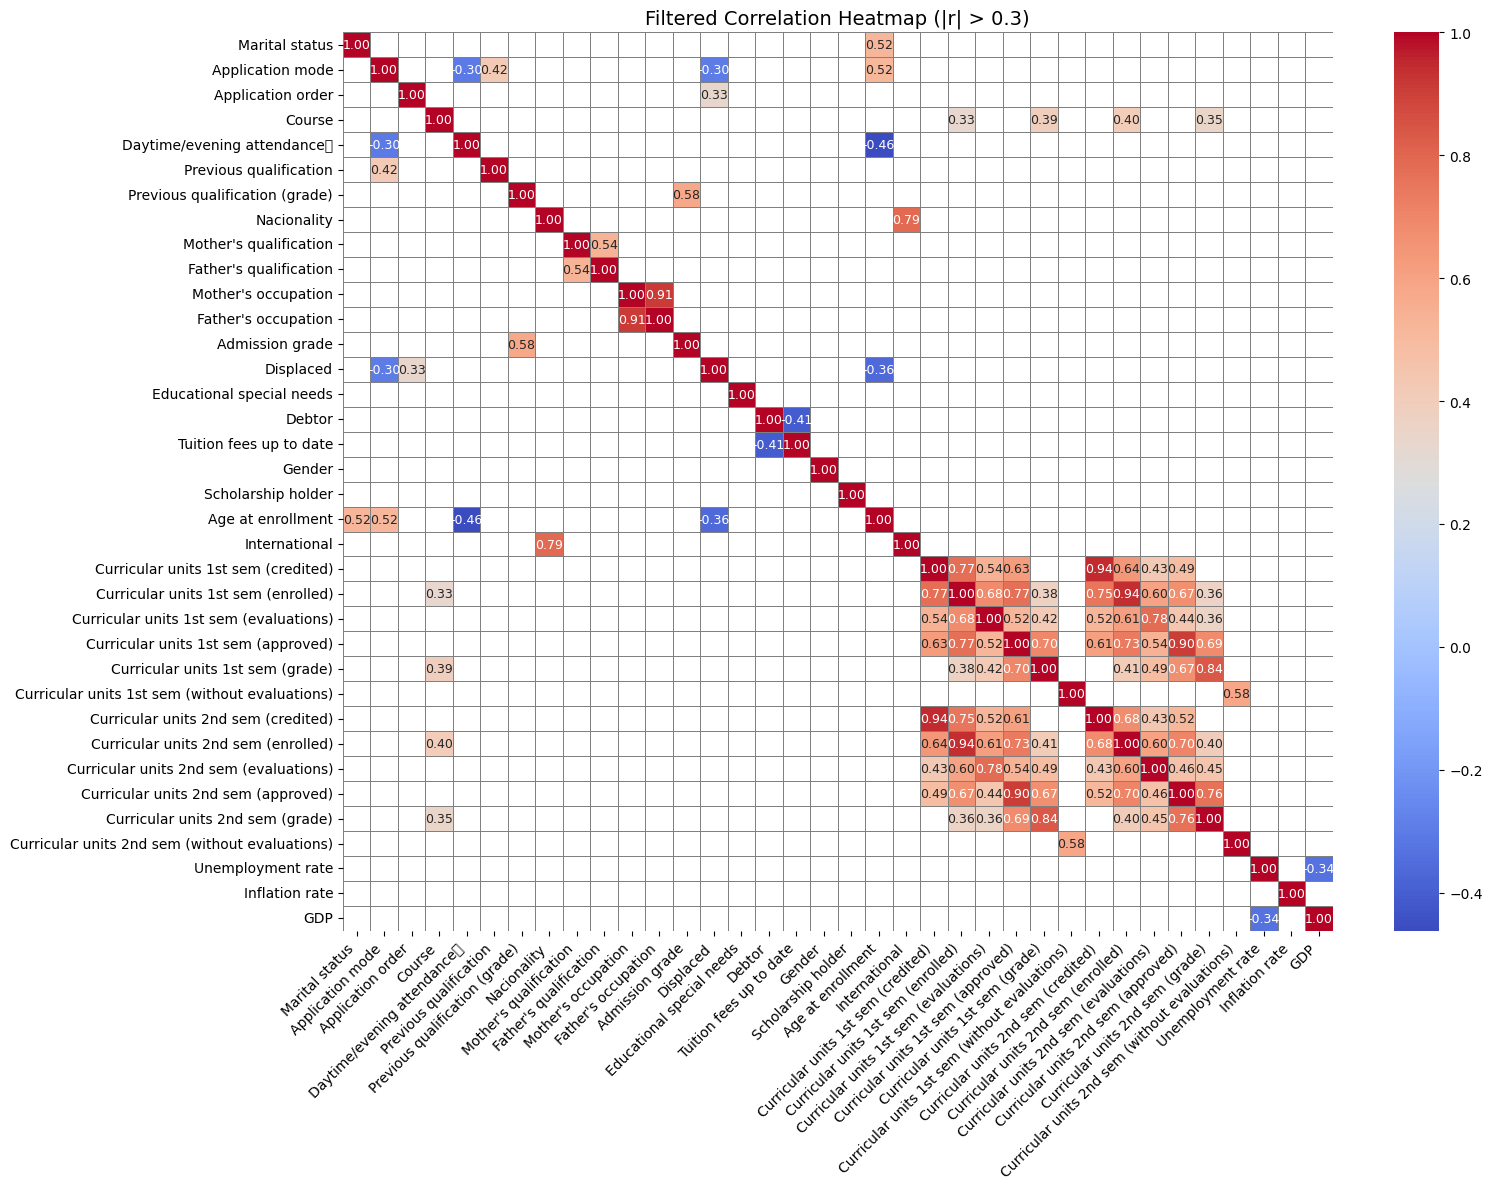

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Mask to display only |correlation| > threshold (e.g., 0.3)
threshold = 0.3
mask = np.abs(corr_matrix) < threshold
filtered_corr = corr_matrix.mask(mask)

# Create a larger figure and use smaller font for clarity
plt.figure(figsize=(16, 12))
sns.heatmap(
    filtered_corr, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=0.5,
    linecolor='gray',
    cbar=True,
    annot_kws={"size": 9},  # smaller font
    mask=filtered_corr.isnull()
)

plt.title("Filtered Correlation Heatmap (|r| > 0.3)", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



### shapped -based interaction values 

In [17]:
import shap

model.fit(X_train, y_train)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

shap_interaction_values = explainer.shap_interaction_values(X_train)
shap.summary_plot(shap_interaction_values, X_train)

NameError: name 'model' is not defined

## dimensionality reduction for cluser detection


In [18]:
import umap
import seaborn as sns

reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(df.select_dtypes(include=['float64', 'int64']))

sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=y)
plt.title("UMAP Projection Colored by Dropout")


ModuleNotFoundError: No module named 'umap'

### AutoDiscovery with feature tools 

In [19]:
import featuretools as ft

es = ft.EntitySet(id="students")
es = es.add_dataframe(dataframe_name="data", dataframe=df, index="index_column")
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name="data")


ModuleNotFoundError: No module named 'featuretools'